In [1]:
try:
    import os, sys
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from bokeh.plotting import *
    import bokeh.io
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    import scipy.stats as stats
except Exception as e:
    print("Import failes due to ",e)
# getting path of folder
fpath = os.getcwd()

In [2]:
# reading input videogames file
game_df = pd.read_csv(fpath+"//Games_Revenue.csv")
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
1,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01
4,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
...,...,...,...,...,...,...,...,...,...
16593,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00
16594,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00
16595,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00
16596,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00


In [3]:
# checking info of the videogames data
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


Name - It is Nominal Categorical as it has no natural order

Platform - It is Nominal Categorical as it has no natural order

Year - It is Discrete Numerical as it varies by finite steps

Genre - It is Nominal Categorical as it has no natural order

Publisher - It is Nominal Categorical as it has no natural order

NA_Sales - It is Continuous Numerical data as it can take any value

EU_Sales - It is Continuous Numerical data as it can take any value

JP_Sales - It is Continuous Numerical data as it can take any value

Other_Sales - It is Continuous Numerical data as it can take any value

In [4]:
# checking the null values of file
game_df.isnull().sum()

Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
# describing dataset
game_df['Genre'].describe()

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

In [6]:
game_df['Platform'].describe()

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [7]:
game_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063
std,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [8]:
# checking duplicate rows if present
dup_row = game_df.duplicated()
game_df[dup_row]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16567,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


In [9]:
# dropping duplicate rows and reset index
game_df.drop_duplicates(inplace = True,ignore_index=True)

In [10]:
game_df.duplicated().sum()

0

In [11]:
#creating global sales column
game_df['global_sales'] = game_df['NA_Sales'] + game_df['EU_Sales'] + game_df['JP_Sales'] + game_df['Other_Sales']
game_df.drop(game_df[game_df['global_sales'] == 0].index, inplace=True)
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...
16592,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16593,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16594,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16595,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [12]:
# Sorting the rows based on global sales decreasing
game_df = game_df.sort_values(by=['global_sales','Year'],ascending=False)
game_df.reset_index(inplace=True,drop=True)

In [13]:
# Assigning rank to the sales
game_df['Rank'] = game_df.index
game_df['Rank'] += 1
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,Rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5
...,...,...,...,...,...,...,...,...,...,...,...
16591,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,16592
16592,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,16593
16593,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,16594
16594,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,16595


In [14]:
# grouping years to decade for analysis
game_df.loc[(game_df['Year'] >= 1980) & (game_df['Year'] <= 1989), 'decade'] = 1980
game_df.loc[(game_df['Year'] >= 1990) & (game_df['Year'] <= 1999), 'decade'] = 1990
game_df.loc[(game_df['Year'] >= 2000) & (game_df['Year'] <= 2009), 'decade'] = 2000
game_df.loc[(game_df['Year'] >= 2010) & (game_df['Year'] <= 2019), 'decade'] = 2010
game_df.loc[(game_df['Year'] >= 2020), 'decade'] = 2020

## Functions for repetitive tasks

In [15]:
# Matplotlib box-plot
def mat_box(plot_type=None, data_df=None, xval=None, yval=None, xname=None, yname=None, title_name=None):
    """ gives the univariate and bivariate boxplot through matplotlib library """
    if plot_type == 'uni':
        plt.boxplot(x = xval, data=data_df)
        plt.xlabel(xname)
        plt.title(title_name)
    if plot_type == 'bi':
        plt.boxplot(x = xval, y=yval, data=data_df)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title(title_name)
    return plt.show()

In [16]:
# Seaborn box-plot
def sns_box(plot_type=None, data_df=None, xval=None, yval=None, xname=None, yname=None, title_name=None):
    """ gives the univariate and bivariate boxplot through seaborn library """
    if plot_type == 'uni':
        sns.boxplot(x = xval, data=data_df)
        plt.xlabel(xname)
        plt.title(title_name)
    if plot_type == 'bi':
        sns.boxplot(x = xval, y=yval, data=data_df)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title(title_name)
    return plt.show()

In [17]:
# Seaborn count plot
def sns_countplt(plot_type=None, data_df=None, xval=None, hueval=None, xname=None, title_name=None):
    """ gives the univariate and bivariate count plot through seaborn library """
    if plot_type == 'uni':
        sns.countplot(x = xval, data=data_df)
        plt.xlabel(xname)
        plt.title(title_name)
    if plot_type == 'bi':
        sns.countplot(x = xval, hue=hueval, data=data_df)
        plt.xlabel(xname)
        plt.title(title_name)
    return plt.show()

### Univariate plots

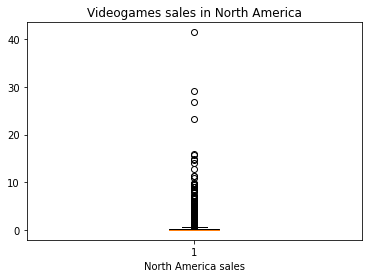

In [18]:
# univariate plot of NA_Sales
mat_box('uni', game_df, xval='NA_Sales', xname='North America sales',title_name='Videogames sales in North America')

Highest copies produced are 41.5 millions for a Video game.

Median sales are 0.08 million

Mean sales are 0.26 million

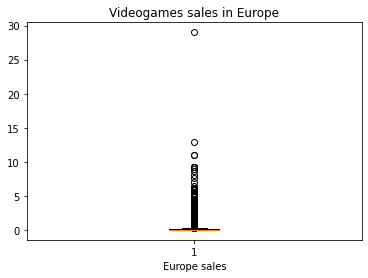

In [19]:
# univariate plot of EU_Sales
mat_box('uni', game_df, xval='EU_Sales', xname='Europe sales',title_name='Videogames sales in Europe')

Highest copies produced are 29.02 millions for a Video game.

Median sales are 0.02 million

Mean sales are 0.15 million

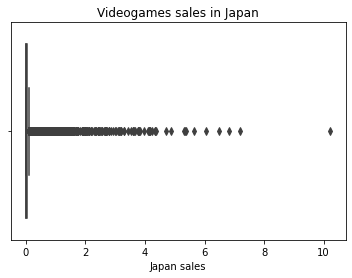

In [20]:
# univariate plot of JP_Sales
sns_box('uni', game_df, xval='JP_Sales', xname='Japan sales',title_name='Videogames sales in Japan')

Highest copies produced are 10.22 millions for a Video game.

Median sales are nearly 0 million(very low sales in the country for video game market)

Mean sales are 0.07 million

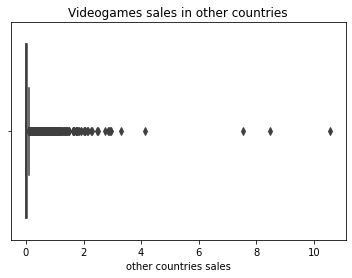

In [21]:
# univariate plot of Other_Sales
sns_box('uni', game_df, xval='Other_Sales', xname='other countries sales',title_name='Videogames sales in other countries')

Highest copies produced are 10.57 millions for a Video game.

Median sales are 0.01 million

Mean sales are 0.05 million

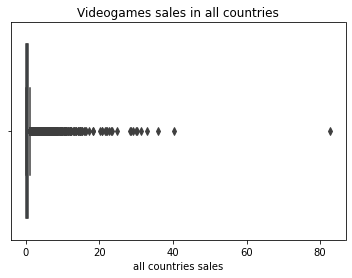

In [22]:
# univariate plot of global_Sales
sns_box('uni', game_df, xval='global_sales', xname='all countries sales',title_name='Videogames sales in all countries')

Highest copies produced are 82.74 millions for a Video game.

Median sales are 0.17 million

Mean sales are 0.53 million

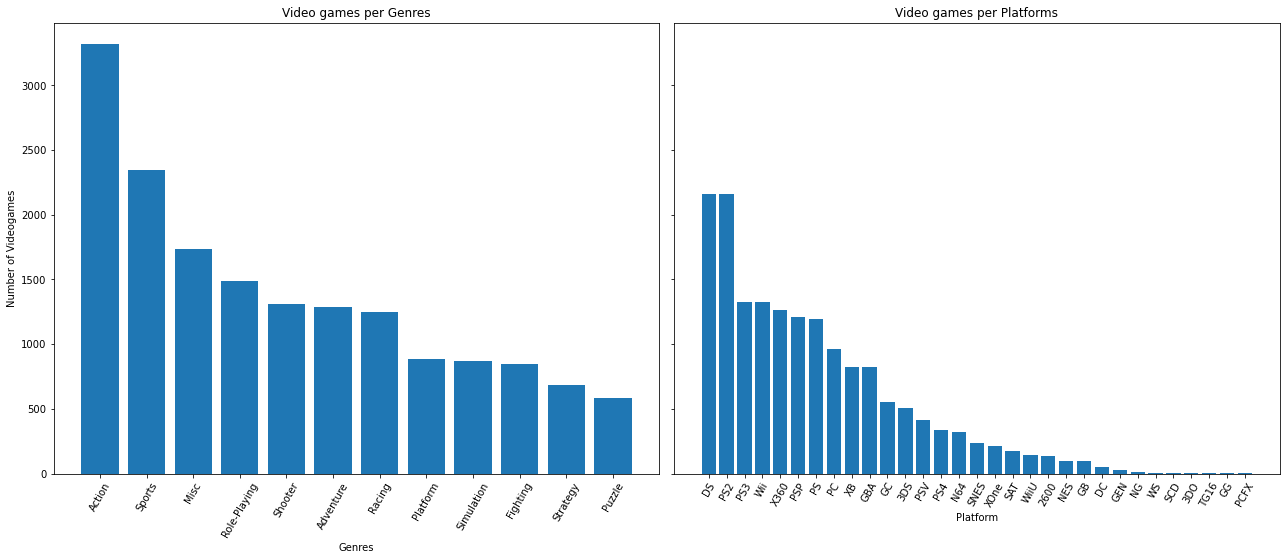

In [23]:
# count plots of videogame platforms and Genres
genre_count = dict(game_df.Genre.value_counts())
platform_count = dict(game_df.Platform.value_counts())
fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].bar(x=list(genre_count.keys()),height=list(genre_count.values()))
ax[1].bar(x=list(platform_count.keys()),height=list(platform_count.values()))
ax[0].set_ylabel('Number of Videogames')
ax[0].set_xlabel('Genres')
ax[0].set_title("Video games per Genres")
ax[1].set_xlabel('Platform')
ax[1].set_title("Video games per Platforms")
ax[0].tick_params('x', labelrotation = 60)
ax[1].tick_params('x', labelrotation = 60)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

Action games released more when comparing all the Genres and Puzzle games were less released.

In all platforms, DS supported games were more released follwed by PS2. PCFX platform games were least considered while developing.

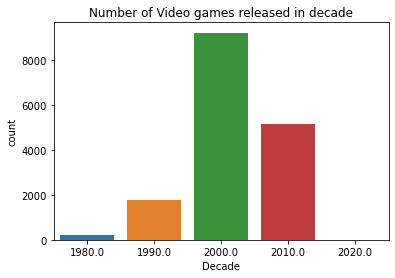

In [24]:
# count plot for Decade wise release of video games
sns_countplt('uni', game_df, xval='decade', xname='Decade', title_name="Number of Video games released in decade")

From 2000 to 2009, More games were developed followed by 2010th Decade.

### Bivariate plots

In [25]:
# relation between platform and Decade
pd.crosstab(index=game_df['decade'],columns=game_df['Platform'],margins=True)

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
decade,,,,,,,,,,,,,,,,,,,,,
1980.0,116,0,0,0,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,205
1990.0,0,3,0,21,0,59,0,0,27,1,...,6,239,2,2,0,0,0,0,0,1769
2000.0,0,0,0,31,1617,27,811,542,0,0,...,0,0,0,4,838,0,553,803,0,9207
2010.0,0,0,500,0,514,0,0,0,0,0,...,0,0,0,0,452,143,682,0,213,5144
2020.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
All,116,3,500,52,2133,97,811,542,27,1,...,6,239,2,6,1290,143,1235,803,213,16326


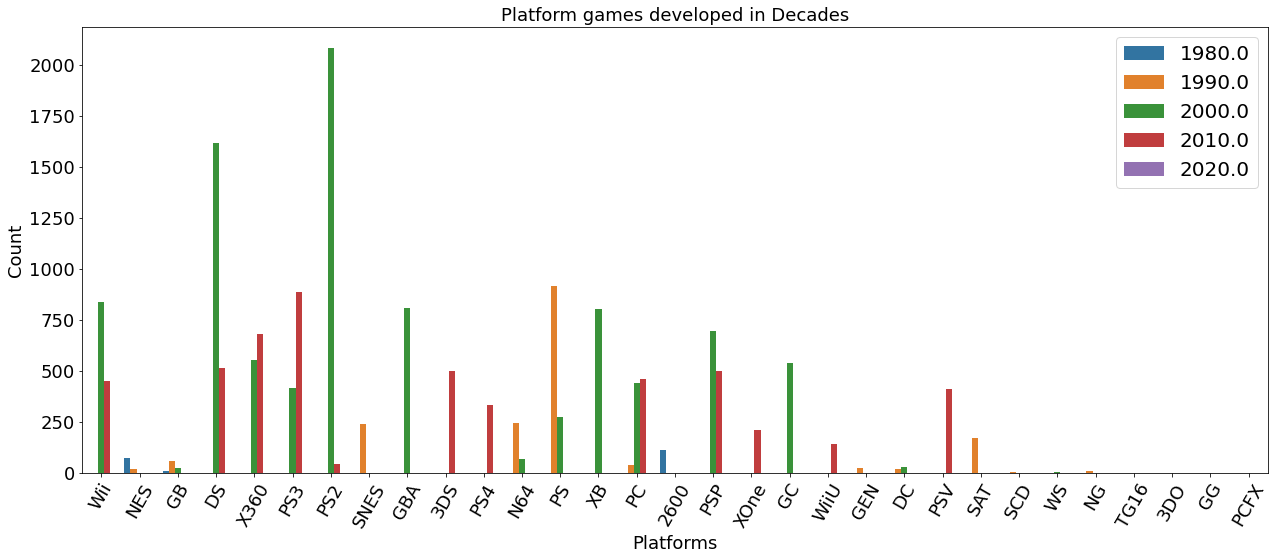

In [26]:
# relation between platform and Decade by count plot
sns.countplot(x='Platform',hue='decade',data=game_df)
plt.xlabel("Platforms",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Platform games developed in Decades",fontsize=18)
plt.xticks(rotation=60,fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper right',prop={'size': 20})
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

Games that were released more are of PS2 and DS platforms in 2000 decade.

Playstation games were introduced in 1990 decade. PS-2 and PS-3 were introduced in 2000 decade whereas, PS-4 games started in 2010 decade.

PC games are continuously developing from 1980 till now.

In [27]:
# relation between Genre and Decade
pd.crosstab(index=game_df['decade'],columns=game_df['Genre'],margins=True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
decade,,,,,,,,,,,,,
1980.0,66,2,4,8,33,19,8,9,30,3,23,0,205
1990.0,162,97,193,116,125,71,183,172,137,86,304,123,1769
2000.0,1585,634,442,1023,567,365,800,732,720,552,1407,380,9207
2010.0,1440,543,197,563,151,116,234,558,395,209,570,168,5144
2020.0,0,0,0,0,0,0,0,0,0,1,0,0,1
All,3253,1276,836,1710,876,571,1225,1471,1282,851,2304,671,16326


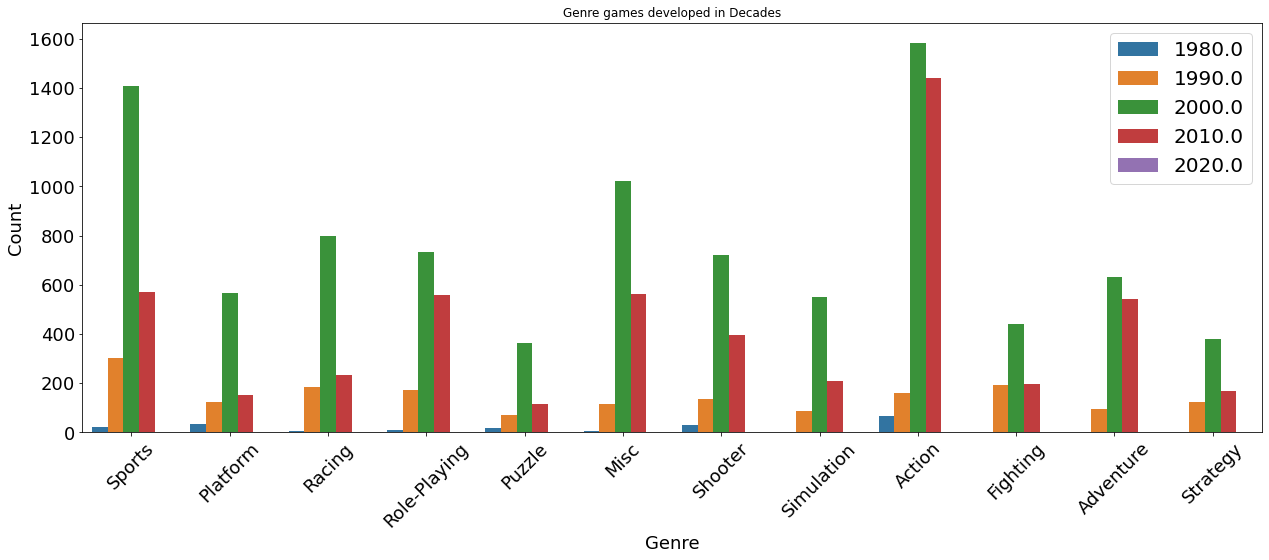

In [28]:
# relation between Genre and Decade by count plot
sns.countplot(x='Genre',hue='decade',data=game_df)
plt.xlabel("Genre",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Genre games developed in Decades")
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper right',prop={'size': 20})
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

During 1980s, Action games were more developed which shifted to sports genre in 1990s.

In 2000s Action and Sports were given more preference along with Misc. Action games continued to lead in 2010 Decade.

Sports, Role-Playing, Misc, Adventure games were roughly given equal preference in 2010s.


In [29]:
# relation between Genre and Platform
pd.crosstab(index=game_df['Platform'],columns=game_df['Genre'],margins=True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,182,37,14,53,28,20,11,86,7,30,26,15,509
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
GB,6,5,0,8,19,15,2,21,1,5,9,7,98
GBA,167,38,23,110,142,41,64,73,40,18,88,18,822
GC,101,20,42,36,73,13,63,27,48,12,110,11,556
GEN,3,2,5,1,7,0,1,3,1,0,3,1,27


PS2 Sports games were more released follwed by DS Platform Misc games and PS3 Action games.

In [30]:
# Analysing NA sales for Genre and Platform
game_gp_na = game_df.groupby(['Genre','Platform']).NA_Sales.agg(['sum'])
#game_gp_na
game_gp_na.rename(columns={'sum':'total_sales'},inplace=True)
game_gp_na.sort_values(by=['total_sales'],ascending=False,inplace=True)
game_gp_na.reset_index(inplace=True)
game_gp_na

,Genre,Platform,total_sales
0,Shooter,X360,174.22
1,Sports,Wii,151.77
2,Action,X360,141.39
3,Sports,PS2,134.12
4,Action,PS2,127.82
...,...,...,...
288,Platform,GG,0.00
289,Sports,SAT,0.00
290,Shooter,TG16,0.00
291,Shooter,SAT,0.00


In [31]:
# sales table of NA for platform and genre
game_gp_natable = game_gp_na.pivot(index='Platform',columns='Genre',values='total_sales')
game_gp_natable

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,27.39,1.59,1.16,3.34,12.38,13.68,2.74,NaN,24.68,0.42,3.22,NaN
3DO,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN
3DS,19.49,1.10,4.43,2.56,13.19,1.29,6.06,20.18,0.66,7.47,1.66,0.78
DC,0.41,0.52,0.00,NaN,1.26,NaN,1.10,0.00,0.00,0.00,2.14,NaN
DS,66.46,25.52,2.58,54.99,37.72,35.39,20.82,47.46,6.62,68.56,15.68,8.91
GB,4.07,8.88,NaN,6.07,29.40,29.35,2.31,28.71,0.40,0.00,3.64,1.49
GBA,37.13,9.21,2.90,24.64,45.81,7.36,11.73,28.29,2.35,3.61,10.30,4.21
GC,26.11,3.82,11.29,10.07,20.40,2.95,14.93,7.91,10.01,5.37,18.37,2.23
GEN,1.86,0.00,3.98,0.00,10.73,NaN,0.00,0.00,0.00,NaN,2.70,0.00


In [32]:
# Analysing EU sales for Genre and Platform
game_gp_eu = game_df.groupby(['Genre','Platform']).EU_Sales.agg(['sum'])
game_gp_eu.rename(columns={'sum':'total_sales'},inplace=True)
game_gp_eu.sort_values(by=['total_sales'],ascending=False,inplace=True)
game_gp_eu.reset_index(inplace=True)
game_gp_eu

,Genre,Platform,total_sales
0,Action,PS3,110.62
1,Sports,Wii,94.99
2,Action,X360,76.81
3,Shooter,X360,76.59
4,Shooter,PS3,75.14
...,...,...,...
288,Puzzle,SNES,0.00
289,Puzzle,SAT,0.00
290,Simulation,DC,0.00
291,Puzzle,3DO,0.00


In [33]:
# sales table of EU for platform and genre
game_gp_eutable = game_gp_eu.pivot(index='Platform',columns='Genre',values='total_sales')
game_gp_eutable

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,1.64,0.10,0.07,0.20,0.72,0.86,0.16,NaN,1.51,0.02,0.19,NaN
3DO,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN
3DS,12.53,0.80,2.20,2.13,10.35,2.12,4.58,13.00,0.35,7.93,2.18,0.35
DC,0.23,0.24,0.00,NaN,0.61,NaN,0.51,0.00,0.00,0.00,0.10,NaN
DS,27.04,10.47,0.32,35.65,18.98,26.29,10.07,18.30,0.59,36.51,7.89,2.54
GB,2.11,3.50,NaN,2.15,9.72,5.03,1.06,21.67,0.39,0.00,1.46,0.73
GBA,14.70,3.52,1.07,9.23,18.85,2.57,5.04,12.87,0.87,1.43,3.79,1.31
GC,7.77,1.26,2.91,2.62,5.95,0.89,4.83,2.44,2.90,1.74,4.78,0.62
GEN,0.55,0.00,1.20,0.00,3.38,NaN,0.00,0.00,0.00,NaN,0.39,0.00


In [34]:
# Analysing JP sales for Genre and Platform
game_gp_jp = game_df.groupby(['Genre','Platform']).JP_Sales.agg(['sum'])
game_gp_jp.rename(columns={'sum':'total_sales'},inplace=True)
game_gp_jp.sort_values(by=['total_sales'],ascending=False,inplace=True)
game_gp_jp.reset_index(inplace=True)
game_gp_jp

,Genre,Platform,total_sales
0,Role-Playing,DS,54.55
1,Role-Playing,PS,40.95
2,Role-Playing,3DS,39.61
3,Misc,DS,37.33
4,Role-Playing,GB,34.55
...,...,...,...
288,Simulation,2600,0.00
289,Simulation,PC,0.00
290,Simulation,WiiU,0.00
291,Simulation,XOne,0.00


In [35]:
# sales table of JP for platform and genre
game_gp_jptable = game_gp_jp.pivot(index='Platform',columns='Genre',values='total_sales')
game_gp_jptable

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
3DO,NaN,0.06,NaN,NaN,NaN,0.02,NaN,NaN,NaN,0.02,NaN,NaN
3DS,22.05,2.74,3.19,5.38,6.45,1.80,2.81,39.61,0.20,10.32,1.97,0.83
DC,0.59,1.70,1.83,NaN,0.58,NaN,0.96,0.68,0.33,0.52,1.37,NaN
DS,12.74,7.87,4.09,37.33,14.15,15.89,4.57,54.55,0.34,15.51,5.70,2.83
GB,1.49,4.25,NaN,4.81,13.84,12.08,0.74,34.55,0.36,3.53,3.74,5.73
GBA,2.47,1.57,0.14,1.69,11.28,2.64,1.50,21.21,0.32,0.74,1.99,1.78
GC,2.83,0.67,3.69,3.58,1.50,0.73,1.57,2.47,0.37,1.21,1.63,1.33
GEN,0.25,0.19,0.54,0.03,0.77,NaN,0.26,0.27,0.13,NaN,0.04,0.19


In [36]:
# Analysing other countries sales for Genre and Platform
game_gp_oc = game_df.groupby(['Genre','Platform']).Other_Sales.agg(['sum'])
game_gp_oc.rename(columns={'sum':'total_sales'},inplace=True)
game_gp_oc.sort_values(by=['total_sales'],ascending=False,inplace=True)
game_gp_oc.reset_index(inplace=True)
game_gp_oc

,Genre,Platform,total_sales
0,Action,PS2,47.64
1,Action,PS3,46.51
2,Sports,PS2,44.66
3,Shooter,PS3,30.21
4,Racing,PS2,27.37
...,...,...,...
288,Sports,SAT,0.00
289,Puzzle,PS4,0.00
290,Simulation,SAT,0.00
291,Platform,SAT,0.00


In [37]:
# sales table of other countries for platform and genre
game_gp_octable = game_gp_oc.pivot(index='Platform',columns='Genre',values='total_sales')
game_gp_octable

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,0.22,0.01,0.01,0.03,0.16,0.15,0.01,NaN,0.28,0.00,0.04,NaN
3DO,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN
3DS,2.84,0.18,0.62,0.40,2.26,0.35,1.06,2.93,0.09,1.40,0.39,0.11
DC,0.03,0.04,0.00,NaN,0.08,NaN,0.08,0.00,0.00,0.00,0.04,NaN
DS,9.14,3.44,0.21,9.75,6.54,6.41,3.13,6.46,0.55,11.36,2.49,1.05
GB,0.26,0.52,NaN,0.32,1.95,1.01,0.44,3.31,0.04,0.02,0.22,0.11
GBA,1.36,0.33,0.05,0.53,2.27,0.24,0.54,1.83,0.02,0.16,0.24,0.16
GC,0.99,0.18,0.54,0.45,0.74,0.12,0.54,0.34,0.33,0.29,0.56,0.10
GEN,0.08,0.00,0.17,0.00,0.56,NaN,0.00,0.00,0.00,NaN,0.08,0.00


In [38]:
# Analysing global sales for Genre and Platform
game_gp = game_df.groupby(['Genre','Platform']).global_sales.agg(['sum'])
game_gp
game_gp.rename(columns={'sum':'total_sales'},inplace=True)
game_gp.sort_values(by=['total_sales'],ascending=False,inplace=True)
game_gp.reset_index(inplace=True)
game_gp

,Genre,Platform,total_sales
0,Action,PS3,307.88
1,Sports,Wii,292.07
2,Shooter,X360,278.44
3,Sports,PS2,273.48
4,Action,PS2,272.71
...,...,...,...
288,Puzzle,PS4,0.02
289,Sports,NG,0.02
290,Puzzle,3DO,0.02
291,Shooter,TG16,0.02


In [39]:
# sales table of all countries for platform and genre
game_gp_table = game_gp.pivot(index='Platform',columns='Genre',values='total_sales')
game_gp_table

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,29.25,1.70,1.24,3.57,13.26,14.69,2.91,NaN,26.47,0.44,3.45,NaN
3DO,NaN,0.06,NaN,NaN,NaN,0.02,NaN,NaN,NaN,0.02,NaN,NaN
3DS,56.91,4.82,10.44,10.47,32.25,5.56,14.51,75.72,1.30,27.12,6.20,2.07
DC,1.26,2.50,1.83,NaN,2.53,NaN,2.65,0.68,0.33,0.52,3.65,NaN
DS,115.38,47.30,7.20,137.72,77.39,83.98,38.59,126.77,8.10,131.94,31.76,15.33
GB,7.93,17.15,NaN,13.35,54.91,47.47,4.55,88.24,1.19,3.55,9.06,8.06
GBA,55.66,14.63,4.16,36.09,78.21,12.81,18.81,64.20,3.56,5.94,16.32,7.46
GC,37.70,5.93,18.43,16.72,28.59,4.69,21.87,13.16,13.61,8.61,25.34,4.28
GEN,2.74,0.19,5.89,0.03,15.44,NaN,0.26,0.27,0.13,NaN,3.21,0.19


When we consider the Total sales till now between Genres and Platforms, Action games on PS3 Platform topped with 307.88 copies followed by Sports games on Wii platform and shooter games on X360 platform. PS2, PS and DS can also be considered as best platforms according to sales.

In [40]:
# Reg plot function
def reg_plot(df,xval,yval,xname,yname,title_name):
    sns.regplot(x= xval, y= yval, data = df, fit_reg = True)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title_name)
    return plt.show()

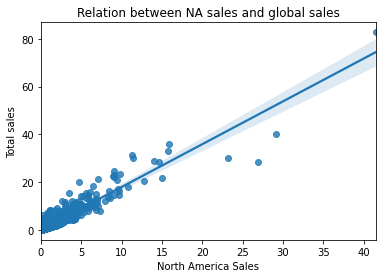

In [41]:
# Relation between NA_Sales and global_sales
reg_plot(game_df,'NA_Sales','global_sales','North America Sales','Total sales','Relation between NA sales and global sales')

Strong positive linear relationship between North America sales and Global sales.

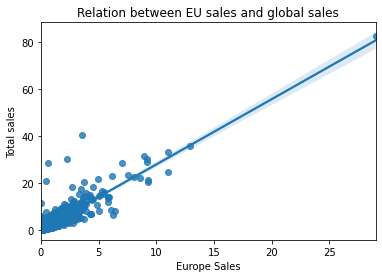

In [42]:
# Relation between EU_Sales and global_sales
reg_plot(game_df,'EU_Sales','global_sales','Europe Sales','Total sales','Relation between EU sales and global sales')

Strong positive linear relationship between European sales and Global sales.

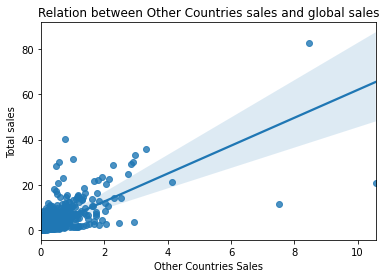

In [43]:
# Relation between other_Sales and global_sales
reg_plot(game_df,'Other_Sales','global_sales','Other Countries Sales','Total sales','Relation between Other Countries sales and global sales')

Strong positive linear relationship between All other countries sales and Global sales.

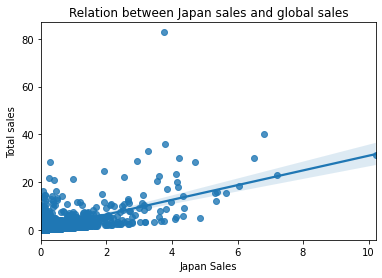

In [44]:
# Relation between JP_Sales and global_sales
reg_plot(game_df,'JP_Sales','global_sales','Japan Sales','Total sales','Relation between Japan sales and global sales')

Average or weak positive relationship between Japanese sales and Global sales.

In [45]:
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,Rank,decade
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,2000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,1980.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3,2000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,2000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16591,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,16592,NaN
16592,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,16593,NaN
16593,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,16594,NaN
16594,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,16595,NaN


### checking median sales according to Genre and Platform

In [46]:
# analysing mean, median, max across different Genres for NA region
genre_analysis_na = game_df.groupby('Genre').NA_Sales.agg([sum,max,np.mean,np.median])
genre_analysis_na

,sum,max,mean,median
Genre,,,,
Action,877.83,9.63,0.264726,0.10
Adventure,105.80,6.16,0.082271,0.00
Fighting,223.59,6.75,0.263667,0.08
Misc,410.24,14.97,0.235906,0.08
Platform,447.05,29.08,0.504571,0.14
Puzzle,123.78,23.20,0.212680,0.05
Racing,359.42,15.85,0.287997,0.10
Role-Playing,327.28,11.27,0.219946,0.04
Shooter,582.60,26.93,0.445073,0.12


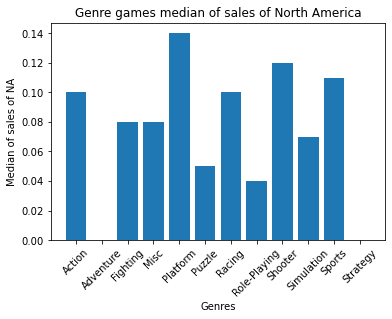

In [47]:
# sales analysis of Genre across different Genres for NA
genre_med_na = {}
for k1 in list(genre_analysis_na.index):
    genre_med_na[k1] = genre_analysis_na.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(genre_med_na.keys()),height=list(genre_med_na.values()))
ax.set_ylabel("Median of sales of NA")
ax.set_xlabel('Genres')
ax.set_title("Genre games median of sales of North America")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [48]:
# analysing mean, median, max across different Genres for EU region
genre_analysis_eu = game_df.groupby('Genre').EU_Sales.agg([sum,max,np.mean,np.median])
genre_analysis_eu

,sum,max,mean,median
Genre,,,,
Action,525.00,9.27,0.158323,0.03
Adventure,64.13,2.79,0.049868,0.00
Fighting,101.32,2.61,0.119481,0.03
Misc,215.98,9.26,0.124198,0.01
Platform,201.63,9.23,0.227573,0.05
Puzzle,50.78,5.36,0.087251,0.01
Racing,238.39,12.88,0.191018,0.04
Role-Playing,188.06,8.89,0.126384,0.01
Shooter,313.27,5.88,0.239320,0.05


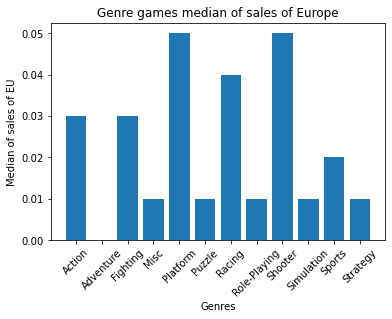

In [49]:
# sales analysis of Genre across different Genres for EU
genre_med_eu = {}
for k1 in list(genre_analysis_eu.index):
    genre_med_eu[k1] = genre_analysis_eu.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(genre_med_eu.keys()),height=list(genre_med_eu.values()))
ax.set_ylabel("Median of sales of EU")
ax.set_xlabel('Genres')
ax.set_title("Genre games median of sales of Europe")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [50]:
# analysing mean, median, max across different Genres for JP region
genre_analysis_jp = game_df.groupby('Genre').JP_Sales.agg([sum,max,np.mean,np.median])
genre_analysis_jp

,sum,max,mean,median
Genre,,,,
Action,159.95,3.96,0.048236,0.00
Adventure,52.07,2.69,0.040490,0.01
Fighting,87.35,2.87,0.103007,0.01
Misc,107.76,4.16,0.061967,0.00
Platform,130.77,6.81,0.147596,0.00
Puzzle,57.31,5.32,0.098471,0.00
Racing,56.69,4.13,0.045425,0.00
Role-Playing,352.31,10.22,0.236767,0.05
Shooter,38.26,1.44,0.029228,0.00


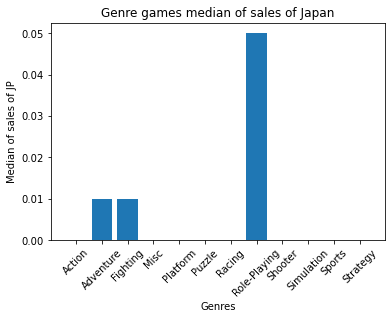

In [51]:
# sales analysis of Genre across different Genres for JP
genre_med_jp = {}
for k1 in list(genre_analysis_jp.index):
    genre_med_jp[k1] = genre_analysis_jp.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(genre_med_jp.keys()),height=list(genre_med_jp.values()))
ax.set_ylabel("Median of sales of JP")
ax.set_xlabel('Genres')
ax.set_title("Genre games median of sales of Japan")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [52]:
# analysing mean, median, max across different Genres for other regions
genre_analysis_oc = game_df.groupby('Genre').Other_Sales.agg([sum,max,np.mean,np.median])
genre_analysis_oc

,sum,max,mean,median
Genre,,,,
Action,187.38,10.57,0.056508,0.01
Adventure,16.81,0.83,0.013072,0.00
Fighting,36.68,1.41,0.043255,0.01
Misc,75.32,2.85,0.043312,0.01
Platform,51.59,2.90,0.058228,0.01
Puzzle,12.55,1.18,0.021564,0.01
Racing,77.27,7.53,0.061915,0.01
Role-Playing,59.61,1.74,0.040060,0.01
Shooter,102.69,2.52,0.078449,0.02


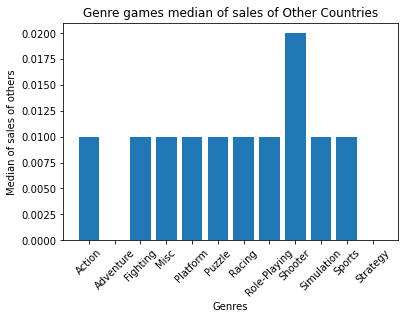

In [53]:
# sales analysis of Genre across different Genres for Other countries
genre_med_oc = {}
for k1 in list(genre_analysis_oc.index):
    genre_med_oc[k1] = genre_analysis_oc.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(genre_med_oc.keys()),height=list(genre_med_oc.values()))
ax.set_ylabel("Median of sales of others")
ax.set_xlabel('Genres')
ax.set_title("Genre games median of sales of Other Countries")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [54]:
# analysing mean, median, max across different Genres globally
genre_analysis = game_df.groupby('Genre').global_sales.agg([sum,max,np.mean,np.median])
genre_analysis

,sum,max,mean,median
Genre,,,,
Action,1750.16,21.39,0.527793,0.190
Adventure,238.81,11.18,0.185700,0.055
Fighting,448.94,13.04,0.529410,0.210
Misc,809.30,29.01,0.465382,0.160
Platform,831.04,40.24,0.937968,0.275
Puzzle,244.42,30.26,0.419966,0.110
Racing,731.77,35.83,0.586354,0.190
Role-Playing,927.26,31.38,0.623159,0.180
Shooter,1036.82,28.31,0.792070,0.230


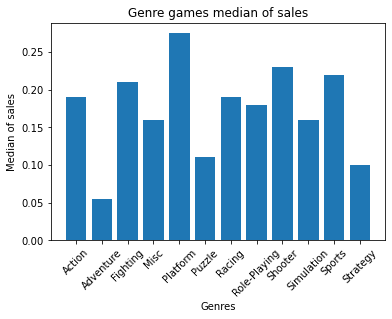

In [55]:
# sales analysis of Genre across different Genres globally
genre_med = {}
for k1 in list(genre_analysis.index):
    genre_med[k1] = genre_analysis.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(genre_med.keys()),height=list(genre_med.values()))
ax.set_ylabel("Median of sales")
ax.set_xlabel('Genres')
ax.set_title("Genre games median of sales")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()


In [56]:
# analysing mean, median, max across different platforms for NA
platform_ana_na = game_df.groupby('Platform').NA_Sales.agg([sum,max,np.mean,np.median])
platform_ana_na

,sum,max,mean,median
Platform,,,,
2600,90.60,7.28,0.681203,0.430
3DO,0.00,0.00,0.000000,0.000
3DS,78.87,5.17,0.154951,0.010
DC,5.43,1.26,0.104423,0.000
DS,390.71,11.38,0.180633,0.060
GB,114.32,23.20,1.166531,0.000
GBA,187.54,6.06,0.228151,0.100
GC,133.46,4.41,0.240036,0.110
GEN,19.27,4.47,0.713704,0.000


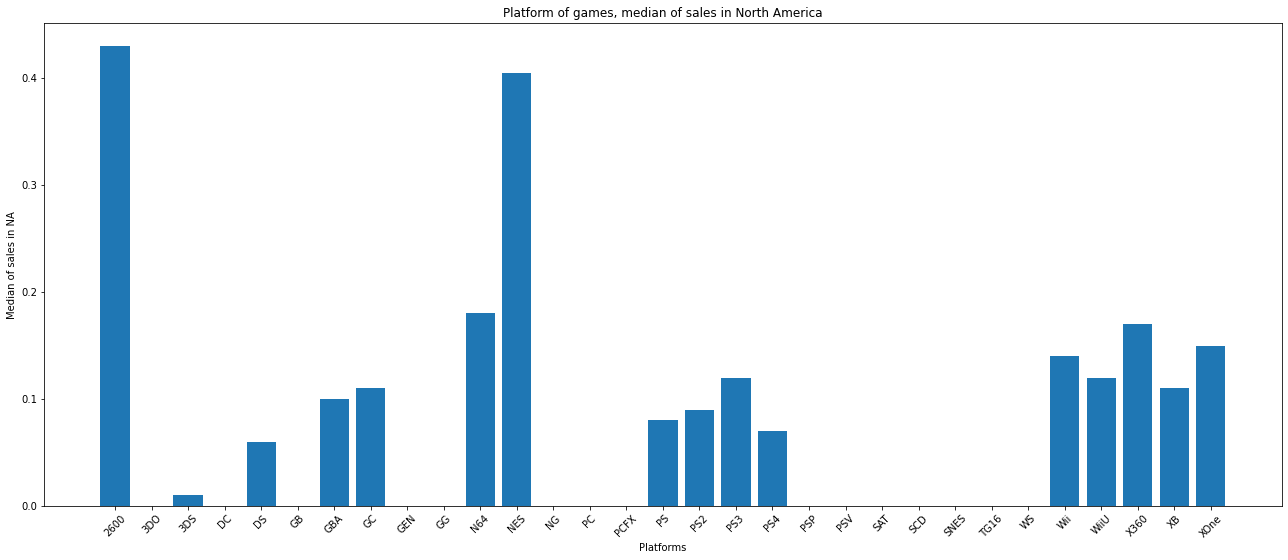

In [57]:
# sales analysis of Platform across different Platforms for NA
platform_med_na = {}
for k1 in list(platform_ana_na.index):
    platform_med_na[k1] = platform_ana_na.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(platform_med_na.keys()),height=list(platform_med_na.values()))
ax.set_ylabel("Median of sales in NA")
ax.set_xlabel('Platforms')
ax.set_title("Platform of games, median of sales in North America")
ax.tick_params('x', labelrotation = 45)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [58]:
# analysing mean, median, max across different platforms for EU
platform_ana_eu = game_df.groupby('Platform').EU_Sales.agg([sum,max,np.mean,np.median])
platform_ana_eu

,sum,max,mean,median
Platform,,,,
2600,5.47,0.45,0.041128,0.03
3DO,0.00,0.00,0.000000,0.00
3DS,58.52,4.05,0.114971,0.00
DC,1.69,0.61,0.032500,0.00
DS,194.65,11.00,0.089991,0.00
GB,47.82,8.89,0.487959,0.00
GBA,75.25,3.90,0.091545,0.04
GC,38.71,1.77,0.069622,0.03
GEN,5.52,1.20,0.204444,0.00


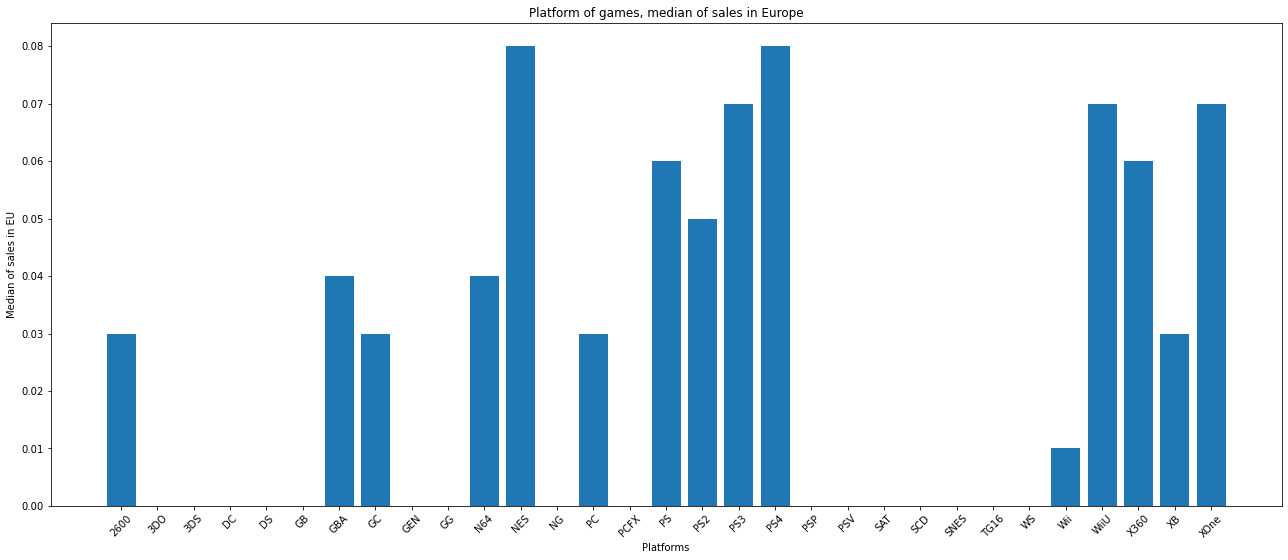

In [59]:
# sales analysis of Platform across different Platforms for EU
platform_med_eu = {}
for k1 in list(platform_ana_eu.index):
    platform_med_eu[k1] = platform_ana_eu.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(platform_med_eu.keys()),height=list(platform_med_eu.values()))
ax.set_ylabel("Median of sales in EU")
ax.set_xlabel('Platforms')
ax.set_title("Platform of games, median of sales in Europe")
ax.tick_params('x', labelrotation = 45)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [60]:
# analysing mean, median, max across different platforms for JP
platform_ana_jp = game_df.groupby('Platform').JP_Sales.agg([sum,max,np.mean,np.median])
platform_ana_jp

,sum,max,mean,median
Platform,,,,
2600,0.00,0.00,0.000000,0.000
3DO,0.10,0.06,0.033333,0.020
3DS,97.35,4.36,0.191257,0.050
DC,8.56,0.52,0.164615,0.120
DS,175.57,6.50,0.081170,0.000
GB,85.12,10.22,0.868571,0.405
GBA,47.33,5.38,0.057579,0.000
GC,21.58,1.39,0.038813,0.000
GEN,2.67,0.31,0.098889,0.070


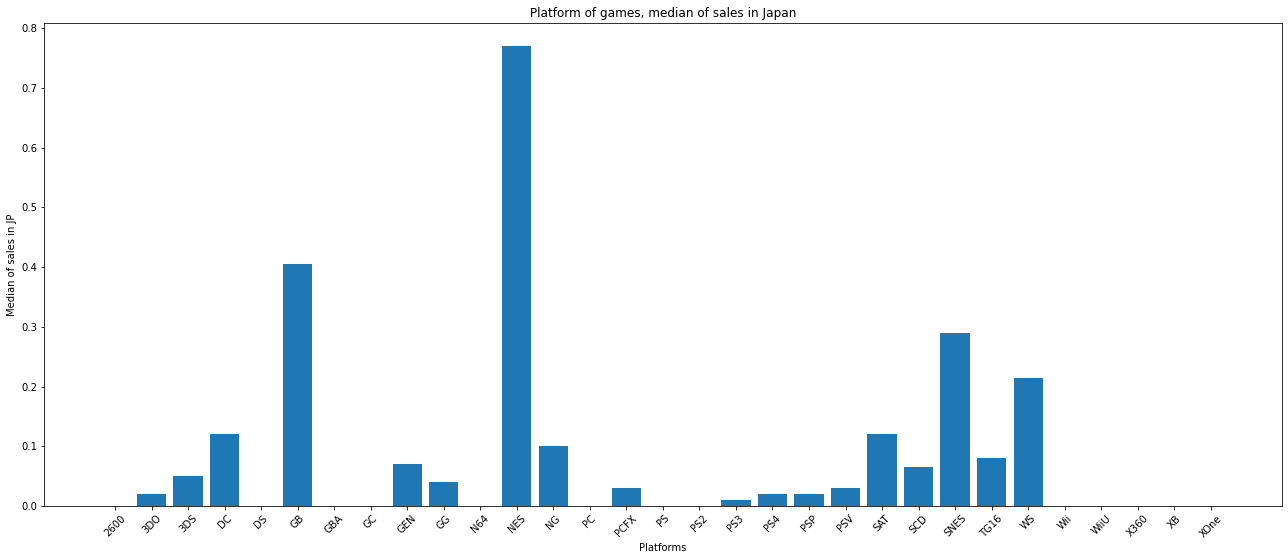

In [61]:
# sales analysis of Platform across different Platforms for JP
platform_med_jp = {}
for k1 in list(platform_ana_jp.index):
    platform_med_jp[k1] = platform_ana_jp.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(platform_med_jp.keys()),height=list(platform_med_jp.values()))
ax.set_ylabel("Median of sales in JP")
ax.set_xlabel('Platforms')
ax.set_title("Platform of games, median of sales in Japan")
ax.tick_params('x', labelrotation = 45)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [62]:
# analysing mean, median, max across different platforms for Other countries
platform_ana_oc = game_df.groupby('Platform').Other_Sales.agg([sum,max,np.mean,np.median])
platform_ana_oc

,sum,max,mean,median
Platform,,,,
2600,0.91,0.08,0.006842,0.00
3DO,0.00,0.00,0.000000,0.00
3DS,12.63,0.89,0.024813,0.00
DC,0.27,0.08,0.005192,0.00
DS,60.53,2.90,0.027984,0.01
GB,8.20,1.00,0.083673,0.01
GBA,7.73,0.50,0.009404,0.00
GC,5.18,0.22,0.009317,0.00
GEN,0.89,0.19,0.032963,0.00


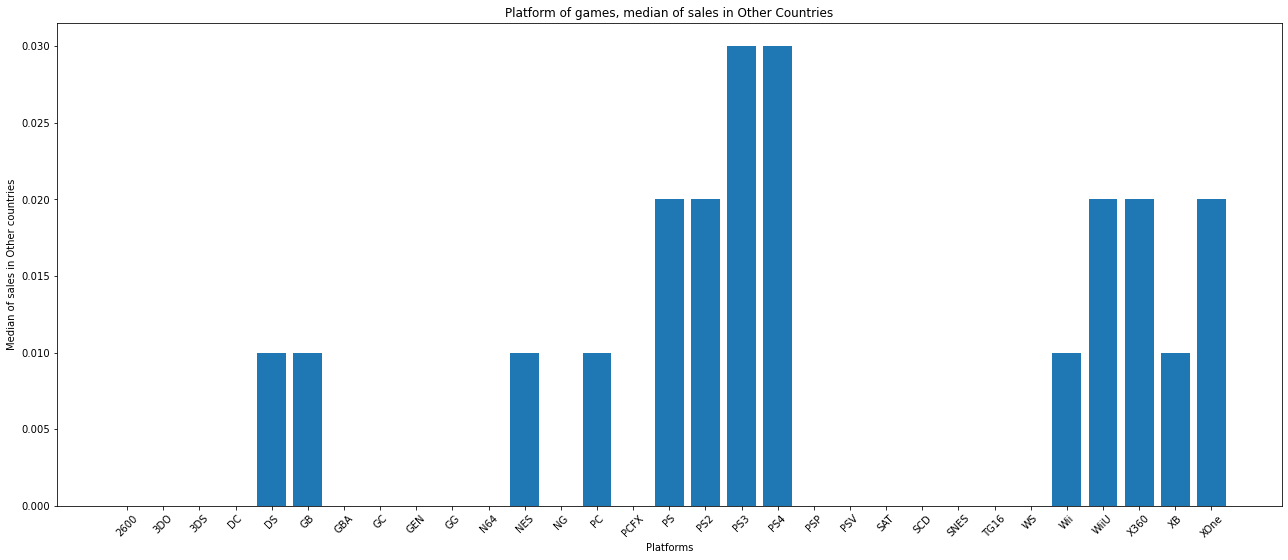

In [63]:
# sales analysis of Platform across different Platforms for other countries
platform_med_oc = {}
for k1 in list(platform_ana_oc.index):
    platform_med_oc[k1] = platform_ana_oc.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(platform_med_oc.keys()),height=list(platform_med_oc.values()))
ax.set_ylabel("Median of sales in Other countries")
ax.set_xlabel('Platforms')
ax.set_title("Platform of games, median of sales in Other Countries")
ax.tick_params('x', labelrotation = 45)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [64]:
# analysing mean, median, max across different platforms globally
platform_ana = game_df.groupby('Platform').global_sales.agg([sum,max,np.mean,np.median])
platform_ana

,sum,max,mean,median
Platform,,,,
2600,96.98,7.81,0.729173,0.460
3DO,0.10,0.06,0.033333,0.020
3DS,247.37,14.35,0.485992,0.120
DC,15.95,2.41,0.306731,0.135
DS,821.46,30.01,0.379778,0.110
GB,255.46,31.38,2.606735,1.165
GBA,317.85,15.84,0.386679,0.160
GC,198.93,7.06,0.357788,0.150
GEN,28.35,6.02,1.050000,0.150


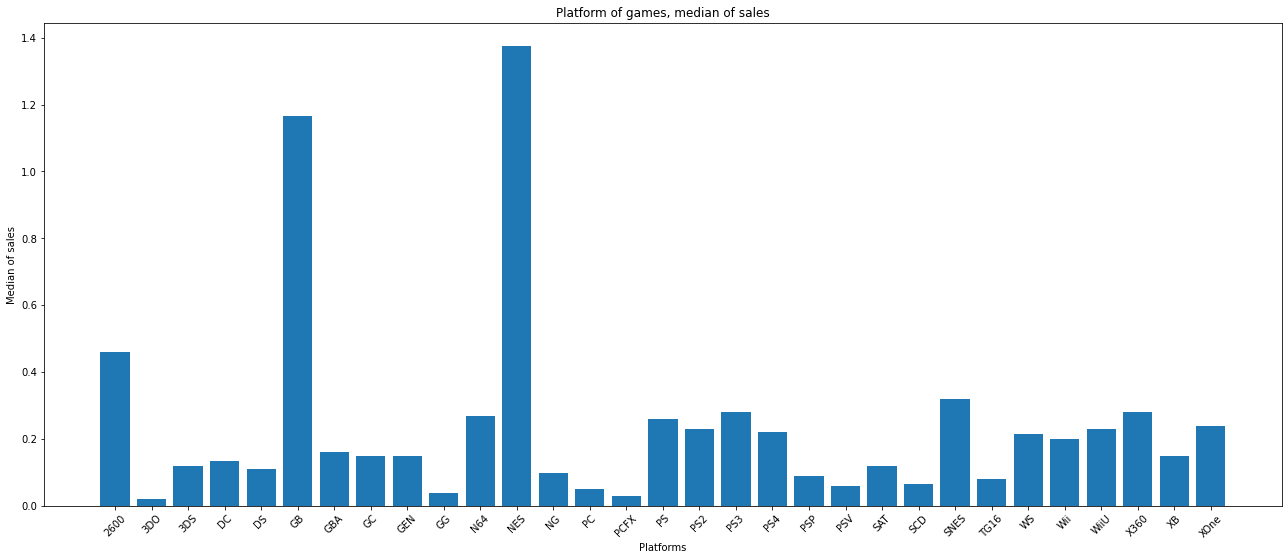

In [65]:
# sales analysis of Platform across different Platforms globally
platform_med = {}
for k1 in list(platform_ana.index):
    platform_med[k1] = platform_ana.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(platform_med.keys()),height=list(platform_med.values()))
ax.set_ylabel("Median of sales")
ax.set_xlabel('Platforms')
ax.set_title("Platform of games, median of sales")
ax.tick_params('x', labelrotation = 45)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()


In [66]:
# analysing mean, median, max across different decades of NA
decade_ana_na = game_df.groupby('decade').NA_Sales.agg([sum,max,np.mean,np.median])
decade_ana_na

,sum,max,mean,median
decade,,,,
1980.0,235.66,29.08,1.149561,0.45
1990.0,576.11,12.78,0.325670,0.05
2000.0,2408.91,41.49,0.261639,0.09
2010.0,1112.48,14.97,0.216267,0.05
2020.0,0.27,0.27,0.270000,0.27


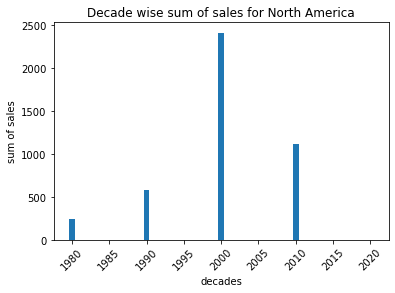

In [67]:
# sales analysis of decade across different decades of NA
decade_sum_na = {}
for k1 in list(decade_ana_na.index):
    decade_sum_na[k1] = decade_ana_na.loc[k1,'sum']
fig, ax = plt.subplots()
ax.bar(x=list(decade_sum_na.keys()),height=list(decade_sum_na.values()))
ax.set_ylabel("sum of sales")
ax.set_xlabel('decades')
ax.set_title("Decade wise sum of sales for North America")
ax.tick_params('x', labelrotation = 45)
plt.show()

In [68]:
# analysing mean, median, max across different decades of EU
decade_ana_eu = game_df.groupby('decade').EU_Sales.agg([sum,max,np.mean,np.median])
decade_ana_eu

,sum,max,mean,median
decade,,,,
1980.0,31.20,3.58,0.152195,0.03
1990.0,282.87,8.89,0.159904,0.02
2000.0,1256.18,29.02,0.136437,0.02
2010.0,838.87,9.27,0.163077,0.03
2020.0,0.00,0.00,0.000000,0.00


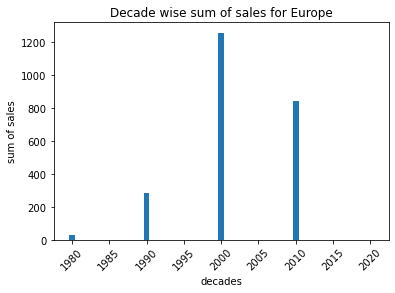

In [69]:
# sales analysis of decade across different decades of EU
decade_sum_eu = {}
for k1 in list(decade_ana_eu.index):
    decade_sum_eu[k1] = decade_ana_eu.loc[k1,'sum']
fig, ax = plt.subplots()
ax.bar(x=list(decade_sum_eu.keys()),height=list(decade_sum_eu.values()))
ax.set_ylabel("sum of sales")
ax.set_xlabel('decades')
ax.set_title("Decade wise sum of sales for Europe")
ax.tick_params('x', labelrotation = 45)
plt.show()

In [70]:
# analysing mean, median, max across different decades of JP
decade_ana_jp = game_df.groupby('decade').JP_Sales.agg([sum,max,np.mean,np.median])
decade_ana_jp

,sum,max,mean,median
decade,,,,
1980.0,102.49,6.81,0.499951,0.00
1990.0,372.33,10.22,0.210475,0.04
2000.0,510.69,6.50,0.055468,0.00
2010.0,298.79,5.65,0.058085,0.00
2020.0,0.00,0.00,0.000000,0.00


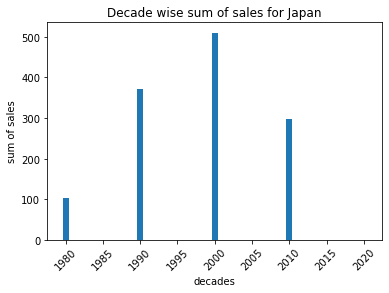

In [71]:
# sales analysis of decade across different decades of JP
decade_sum_jp = {}
for k1 in list(decade_ana_jp.index):
    decade_sum_jp[k1] = decade_ana_jp.loc[k1,'sum']
fig, ax = plt.subplots()
ax.bar(x=list(decade_sum_jp.keys()),height=list(decade_sum_jp.values()))
ax.set_ylabel("sum of sales")
ax.set_xlabel('decades')
ax.set_title("Decade wise sum of sales for Japan")
ax.tick_params('x', labelrotation = 45)
plt.show()

In [72]:
# analysing mean, median, max across different decades of other countries
decade_ana_oc = game_df.groupby('decade').Other_Sales.agg([sum,max,np.mean,np.median])
decade_ana_oc

,sum,max,mean,median
decade,,,,
1980.0,7.13,1.51,0.034780,0.01
1990.0,47.42,1.00,0.026806,0.01
2000.0,464.73,10.57,0.050476,0.01
2010.0,269.71,4.14,0.052432,0.01
2020.0,0.02,0.02,0.020000,0.02


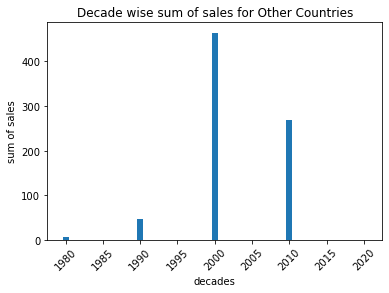

In [73]:
# sales analysis of decade across different decades of Other countries
decade_sum_oc = {}
for k1 in list(decade_ana_oc.index):
    decade_sum_oc[k1] = decade_ana_oc.loc[k1,'sum']
fig, ax = plt.subplots()
ax.bar(x=list(decade_sum_oc.keys()),height=list(decade_sum_oc.values()))
ax.set_ylabel("sum of sales")
ax.set_xlabel('decades')
ax.set_title("Decade wise sum of sales for Other Countries")
ax.tick_params('x', labelrotation = 45)
plt.show()

In [74]:
# analysing mean, median, max across different decades globally
decade_ana = game_df.groupby('decade').global_sales.agg([sum,max,np.mean,np.median])
decade_ana

,sum,max,mean,median
decade,,,,
1980.0,376.48,40.24,1.836488,0.85
1990.0,1278.73,31.38,0.722855,0.27
2000.0,4640.51,82.74,0.504020,0.17
2010.0,2519.85,21.82,0.489862,0.14
2020.0,0.29,0.29,0.290000,0.29


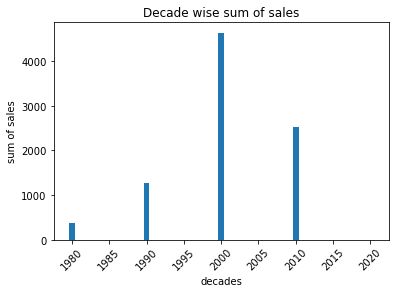

In [75]:
# sales analysis of decade across different decades globally
decade_sum = {}
for k1 in list(decade_ana.index):
    decade_sum[k1] = decade_ana.loc[k1,'sum']
fig, ax = plt.subplots()
ax.bar(x=list(decade_sum.keys()),height=list(decade_sum.values()))
ax.set_ylabel("sum of sales")
ax.set_xlabel('decades')
ax.set_title("Decade wise sum of sales")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [76]:
# Bokeh plot of relation between NA_Sales and global_sales, EU_Sales and global sales

# output to static HTML file
output_file("linked_brushing.html")
# NEW: create a column data source for the plots to share
source = ColumnDataSource(data=dict(x0=game_df['NA_Sales'], x1=game_df['EU_Sales'], y0=game_df['global_sales']))
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"
# create a new plot and add a renderer
left = figure(tools=TOOLS, width=350, height=350, title=None)
left.circle('x0', 'y0', source=source)
# create another new plot and add a renderer
right = figure(tools=TOOLS, width=350, height=350, title=None)
right.circle('x1', 'y0', source=source)
# put the subplots in a gridplot
p = gridplot([[left, right]])
# show the results
show(p)

### Multivariate plots

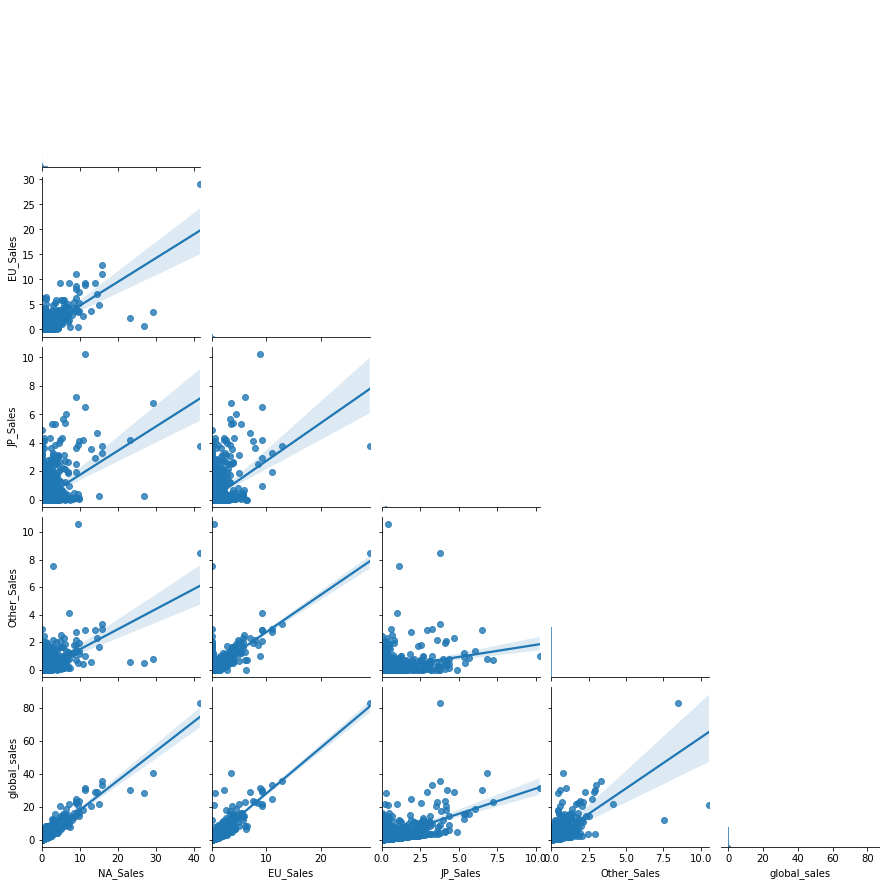

In [77]:
# Pair plots between NA_Sales, EU_Sales, JP_Sales, Other Country Sales and global sales
sales_plt = sns.pairplot(game_df[game_df.columns[5:10].tolist()],kind='reg',corner=True)
plt.show()

##### Correlations

In [78]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [79]:
kendalltau(game_df['NA_Sales'],game_df['global_sales'])

KendalltauResult(correlation=0.6729044332975631, pvalue=0.0)

As Correlation = 0.67 near to 1, Strong Positive linear relationship between North America sales and Global sales of Video games.

Also, P-value <0.05 so there is relationship between NA_Sales and global_sales.

In [80]:
kendalltau(game_df['NA_Sales'],game_df['EU_Sales'])

KendalltauResult(correlation=0.5559761834448022, pvalue=0.0)

As Correlation = 0.56 middle between 0 and 1, not that much strong Positive linear relationship between North America sales and Europe sales of Video games.

Also, P-value <0.05 so there is relationship between NA_Sales and EU_Sales.

In [81]:
kendalltau(game_df['NA_Sales'],game_df['JP_Sales'])

KendalltauResult(correlation=-0.18110397850584556, pvalue=1.3904721029990591e-199)

As Correlation = -0.18 near to 0, very weak negative linear relationship between North America sales and Japan sales of Video games.

Also, P-value <0.05 so there is relationship between NA_Sales and JP_Sales.

In [82]:
kendalltau(game_df['NA_Sales'],game_df['Other_Sales'])

KendalltauResult(correlation=0.6400534614787534, pvalue=0.0)

As Correlation = 0.64 near to 1, Strong Positive linear relationship between North America sales and Other countries sales of Video games.

Also, P-value <0.05 so there is relationship between NA_Sales and Other_Sales.

In [83]:
kendalltau(game_df['EU_Sales'],game_df['global_sales'])

KendalltauResult(correlation=0.5615616129737736, pvalue=0.0)

As Correlation = 0.56 middle between 0 and 1, not that much strong Positive linear relationship between global sales and Europe sales of Video games.

Also, P-value <0.05 so there is relationship between global_Sales and EU_Sales.

In [84]:
kendalltau(game_df['EU_Sales'],game_df['JP_Sales'])

KendalltauResult(correlation=-0.14318296022502564, pvalue=1.5119555683435e-120)

As Correlation = -0.14 near to 0, very weak negative linear relationship between Europe sales and Japan sales of Video games.

Also, P-value <0.05 so there is relationship between EU_Sales and JP_Sales.

In [85]:
kendalltau(game_df['EU_Sales'],game_df['Other_Sales'])

KendalltauResult(correlation=0.6614539332005736, pvalue=0.0)

As Correlation = 0.66 near to 1, Strong Positive linear relationship between Europe sales and Other countries sales of Video games.

Also, P-value <0.05 so there is relationship between Eu_Sales and Other_Sales.

In [86]:
kendalltau(game_df['JP_Sales'],game_df['Other_Sales'])

KendalltauResult(correlation=-0.05885080870865037, pvalue=1.0366616316568152e-20)

As Correlation = -0.05 near to 0, very weak negative linear relationship between Other sales and Japan sales of Video games.

Also, P-value <0.05 so there is relationship between Other_Sales and JP_Sales.

In [87]:
kendalltau(game_df['JP_Sales'],game_df['global_sales'])

KendalltauResult(correlation=0.12937803248225285, pvalue=2.933740311422377e-108)

As Correlation = 0.13 near to 0, very weak positive linear relationship between global sales and Japan sales of Video games.

Also, P-value <0.05 so there is relationship between global_Sales and JP_Sales.

In [88]:
kendalltau(game_df['Other_Sales'],game_df['global_sales'])

KendalltauResult(correlation=0.6861738713086444, pvalue=0.0)

As Correlation = 0.69 near to 1, Strong Positive linear relationship between Other countries sales and global sales of Video games.

Also, P-value <0.05 so there is relationship between Other_Sales and global_Sales.

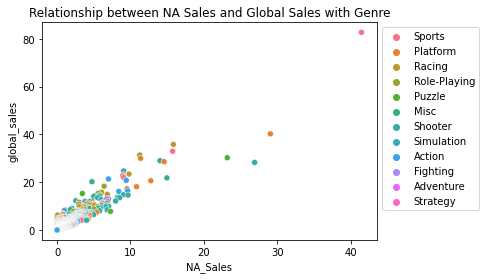

In [89]:
# Scatter Plot - Multivariate plot of NA_Sales, global_sales with different Genres
sns.scatterplot(x='NA_Sales',y = 'global_sales',hue='Genre',data=game_df)
plt.title('Relationship between NA Sales and Global Sales with Genre')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

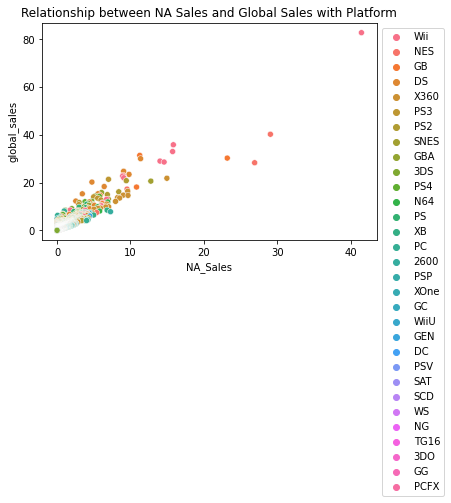

In [90]:
# Scatter Plot - Multivariate plot of NA_Sales, global_sales with different Platforms
sns.scatterplot(x='NA_Sales',y = 'global_sales',hue='Platform',data=game_df)
plt.title('Relationship between NA Sales and Global Sales with Platform')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

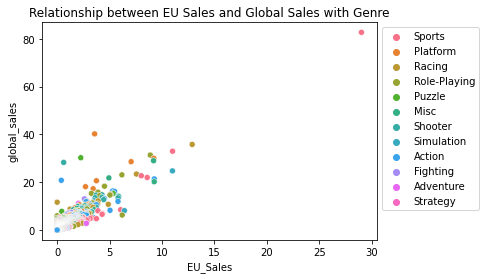

In [91]:
# Scatter Plot - Multivariate plot of EU_Sales, global_sales with different Genres
sns.scatterplot(x='EU_Sales',y = 'global_sales',hue='Genre',data=game_df)
plt.title('Relationship between EU Sales and Global Sales with Genre')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

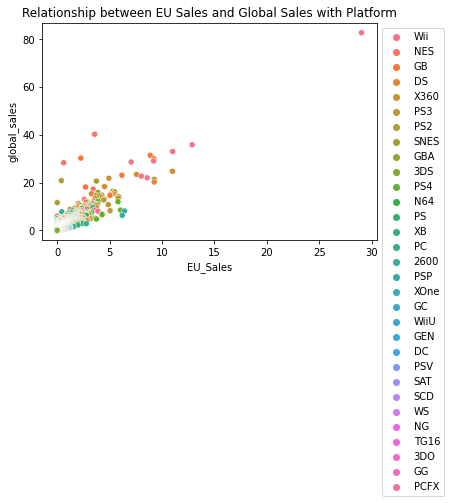

In [92]:
# Scatter Plot - Multivariate plot of EU_Sales, global_sales with different Platforms
sns.scatterplot(x='EU_Sales',y = 'global_sales',hue='Platform',data=game_df)
plt.title('Relationship between EU Sales and Global Sales with Platform')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Hypothesis Testing

In [93]:
# checking values of sales across different Regions
print("Sales Description: \n")
print(game_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','global_sales']].describe())


Sales Description: 

           NA_Sales      EU_Sales      JP_Sales   Other_Sales  global_sales
count  16596.000000  16596.000000  16596.000000  16596.000000  16596.000000
mean       0.264699      0.146670      0.077790      0.048069      0.537228
std        0.816727      0.505379      0.309308      0.188599      1.555234
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.472500
max       41.490000     29.020000     10.220000     10.570000     82.740000


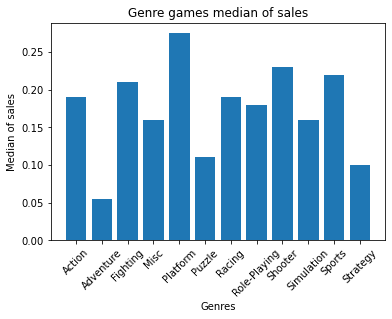

In [94]:
# relation between Genre and global sales
genre_med = {}
for k1 in list(genre_analysis.index):
    genre_med[k1] = genre_analysis.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(genre_med.keys()),height=list(genre_med.values()))
ax.set_ylabel("Median of sales")
ax.set_xlabel('Genres')
ax.set_title("Genre games median of sales")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()


Testing with Two- Sample Wilcoxon-Mann-Whitney Test(Rank Sum) as Genres are Skewed Plots.

##### Hypothesis tests on Genres

In [95]:
# relation between Action games sales and Fighting games sales
ac_s = game_df[game_df['Genre']=='Action']['global_sales']
fi_s = game_df[game_df['Genre']=='Fighting']['global_sales']
print("Action games Sales: \n",ac_s.describe())
print(100*"=")
print("Fighting games Sales: \n",fi_s.describe())

Action games Sales: 
 count    3316.000000
mean        0.527793
std         1.156544
min         0.010000
25%         0.070000
50%         0.190000
75%         0.500000
max        21.390000
Name: global_sales, dtype: float64
Fighting games Sales: 
 count    848.000000
mean       0.529410
std        0.955867
min        0.010000
25%        0.080000
50%        0.210000
75%        0.550000
max       13.040000
Name: global_sales, dtype: float64


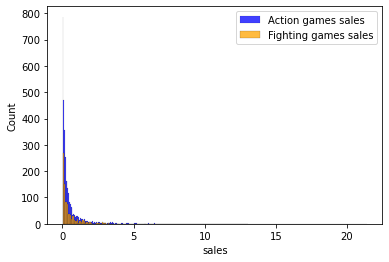

In [96]:
sns.histplot(x = game_df[game_df['Genre']=='Action']['global_sales'], color = 'blue', label = 'Action games sales')
sns.histplot(x = game_df[game_df['Genre']=='Fighting']['global_sales'], color = 'orange', label = 'Fighting games sales')
plt.xlabel("sales")
plt.legend()
plt.show()

###### Hypothesis Test-1

H0 = True Median of global Sales on Action games = True Median of global Sales on Fighting games

H1 = True Median of global Sales on Action games != True Median of global Sales on Fighting games

In [97]:
from scipy.stats import ranksums
ranksums(game_df[game_df['Genre']=='Action']['global_sales'], game_df[game_df['Genre']=='Fighting']['global_sales'])

RanksumsResult(statistic=-1.741136909919945, pvalue=0.08165958288197164)

As P-value = 0.08 > 0.05, we failed to reject Null Hypothesis.

So, True Median of global Sales on Action games is equal to True Median of global Sales on Fighting games

In [98]:
# relation between sales of Platform games and Sports games
pl_s = game_df[game_df['Genre']=='Platform']['global_sales']
sp_s = game_df[game_df['Genre']=='Sports']['global_sales']
print("Platform games Sales: \n",pl_s.describe())
print(100*"=")
print("Sports games Sales: \n",sp_s.describe())

Platform games Sales: 
 count    886.000000
mean       0.937968
std        2.585410
min        0.010000
25%        0.090000
50%        0.275000
75%        0.797500
max       40.240000
Name: global_sales, dtype: float64
Sports games Sales: 
 count    2346.000000
mean        0.567153
std         2.089804
min         0.010000
25%         0.090000
50%         0.220000
75%         0.560000
max        82.740000
Name: global_sales, dtype: float64


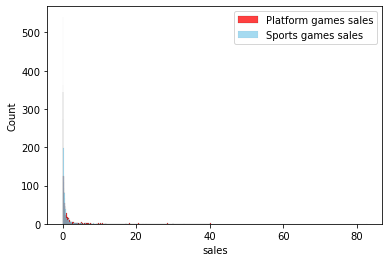

In [99]:
sns.histplot(x = game_df[game_df['Genre']=='Platform']['global_sales'], color = 'red', label = 'Platform games sales')
sns.histplot(x = game_df[game_df['Genre']=='Sports']['global_sales'], color = 'skyblue', label = 'Sports games sales')
plt.xlabel("sales")
plt.legend()
plt.show()

##### Hypothesis Test-2

H0 = True Median of global Sales on Platform games = True Median of global Sales on Sports games

H1 = True Median of global Sales on Platform games != True Median of global Sales on Sports games

In [100]:
ranksums(game_df[game_df['Genre']=='Platform']['global_sales'], game_df[game_df['Genre']=='Sports']['global_sales'])

RanksumsResult(statistic=3.038716298024331, pvalue=0.0023758848011815785)

As P-value = 0.002 < 0.05, we can reject Null Hypothesis.

So, True Median of global Sales on Platform games is not equal to True Median of global Sales on Sports games

In [101]:
# relation between sales of Puzzle games and Strategy games
pz_s = game_df[game_df['Genre']=='Puzzle']['global_sales']
st_s = game_df[game_df['Genre']=='Strategy']['global_sales']
print("Puzzle games Sales: \n",pz_s.describe())
print(100*"=")
print("Strategy games Sales: \n",st_s.describe())

Puzzle games Sales: 
 count    582.000000
mean       0.419966
std        1.561709
min        0.010000
25%        0.040000
50%        0.110000
75%        0.307500
max       30.260000
Name: global_sales, dtype: float64
Strategy games Sales: 
 count    681.000000
mean       0.256769
std        0.521068
min        0.010000
25%        0.040000
50%        0.100000
75%        0.270000
max        5.450000
Name: global_sales, dtype: float64


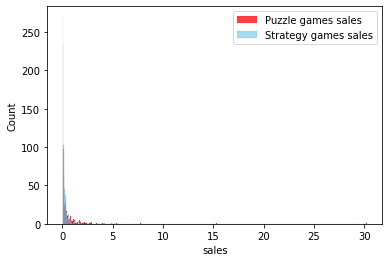

In [102]:
sns.histplot(x = game_df[game_df['Genre']=='Puzzle']['global_sales'], color = 'red', label = 'Puzzle games sales')
sns.histplot(x = game_df[game_df['Genre']=='Strategy']['global_sales'], color = 'skyblue', label = 'Strategy games sales')
plt.xlabel("sales")
plt.legend()
plt.show()

##### Hypothesis Test-3

H0 = True Median of global Sales on Puzzle games = True Median of global Sales on Strategy games

H1 = True Median of global Sales on Puzzle games != True Median of global Sales on Strategy games

In [103]:
ranksums(game_df[game_df['Genre']=='Puzzle']['global_sales'], game_df[game_df['Genre']=='Strategy']['global_sales'])

RanksumsResult(statistic=1.429904407693854, pvalue=0.15274445681057897)

As P-value = 0.15 > 0.05, we failed to reject Null Hypothesis.

So, True Median of global Sales on Puzzle games is equal to True Median of global Sales on Strategy games

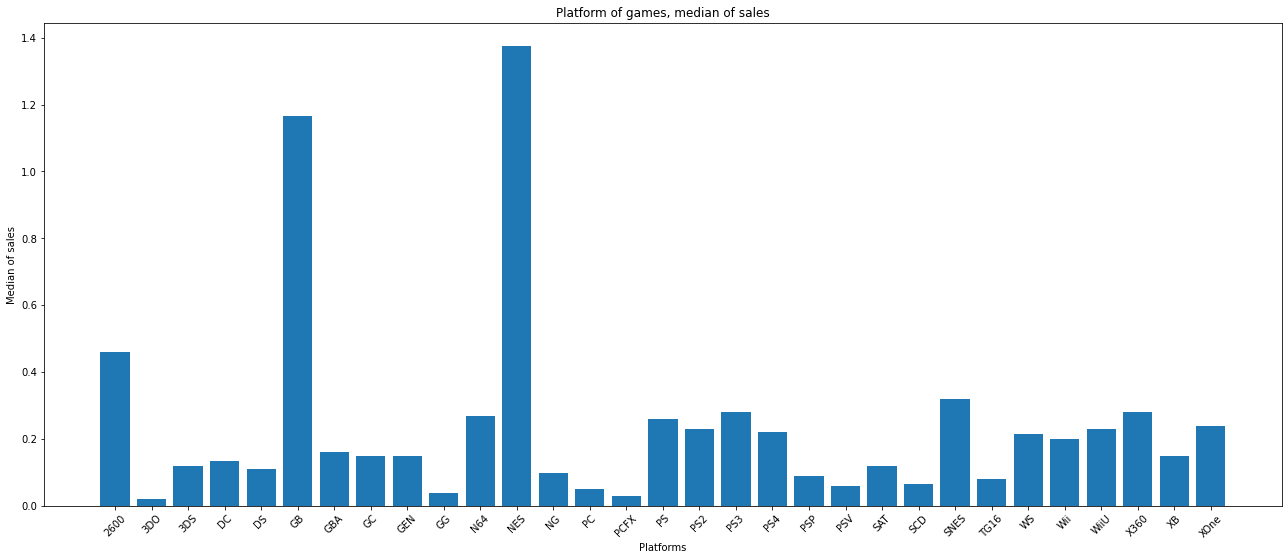

In [104]:
# sales analysis of Platform across different Platforms
platform_med = {}
for k1 in list(platform_ana.index):
    platform_med[k1] = platform_ana.loc[k1,'median']
fig, ax = plt.subplots()
ax.bar(x=list(platform_med.keys()),height=list(platform_med.values()))
ax.set_ylabel("Median of sales")
ax.set_xlabel('Platforms')
ax.set_title("Platform of games, median of sales")
ax.tick_params('x', labelrotation = 45)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

##### Hypothesis tests on Platforms

In [105]:
# relation between sales of GB Platform and NES Platform
gb_s = game_df[game_df['Platform']=='GB']['global_sales']
ne_s = game_df[game_df['Platform']=='NES']['global_sales']
print("GB Platform: \n",gb_s.describe())
print(100*"=")
print("NES Platform Sales: \n",ne_s.describe())

GB Platform: 
 count    98.000000
mean      2.606735
std       5.365478
min       0.060000
25%       0.302500
50%       1.165000
75%       2.165000
max      31.380000
Name: global_sales, dtype: float64
NES Platform Sales: 
 count    98.000000
mean      2.561735
std       5.108012
min       0.060000
25%       1.000000
50%       1.375000
75%       2.222500
max      40.240000
Name: global_sales, dtype: float64


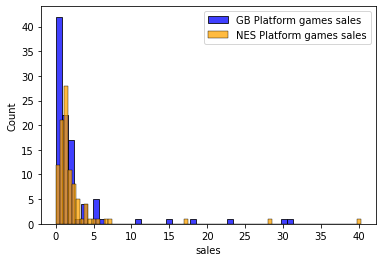

In [106]:
sns.histplot(x = game_df[game_df['Platform']=='GB']['global_sales'], color = 'blue', label = 'GB Platform games sales')
sns.histplot(x = game_df[game_df['Platform']=='NES']['global_sales'], color = 'orange', label = 'NES Platform games sales')
plt.xlabel("sales")
plt.legend()
plt.show()

##### Hypothesis Test-1

H0 = True Median of global Sales on GB Platform games = True Median of global Sales on NES Platform games

H1 = True Median of global Sales on GB Platform games != True Median of global Sales on NES Platform games

In [107]:
ranksums(game_df[game_df['Platform']=='GB']['global_sales'], game_df[game_df['Platform']=='NES']['global_sales'])

RanksumsResult(statistic=-2.2665950902370033, pvalue=0.023414972299569677)

As P-value = 0.02 < 0.05, we can reject Null Hypothesis.

So, True Median of global Sales on GB Platform games is not equal to True Median of global Sales on NES Platform games.

In [108]:
# relation between sales of PS2 Platform and PS3 Platform
ps2_s = game_df[game_df['Platform']=='PS2']['global_sales']
ps3_s = game_df[game_df['Platform']=='PS3']['global_sales']
print("PS2 Platform: \n",ps2_s.describe())
print(100*"=")
print("PS3 Platform Sales: \n",ps3_s.describe())

PS2 Platform: 
 count    2160.000000
mean        0.581375
std         1.138122
min         0.010000
25%         0.080000
50%         0.230000
75%         0.560000
max        20.810000
Name: global_sales, dtype: float64
PS3 Platform Sales: 
 count    1329.000000
mean        0.720760
std         1.412907
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.390000
Name: global_sales, dtype: float64


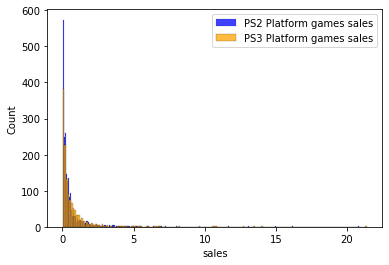

In [109]:
sns.histplot(x = game_df[game_df['Platform']=='PS2']['global_sales'], color = 'blue', label = 'PS2 Platform games sales')
sns.histplot(x = game_df[game_df['Platform']=='PS3']['global_sales'], color = 'orange', label = 'PS3 Platform games sales')
plt.xlabel("sales")
plt.legend()
plt.show()

##### Hypothesis Test-2

H0 = True Median of global Sales on PS2 Platform games = True Median of global Sales on PS3 Platform games

H1 = True Median of global Sales on PS2 Platform games != True Median of global Sales on PS3 Platform games

In [110]:
ranksums(game_df[game_df['Platform']=='PS2']['global_sales'], game_df[game_df['Platform']=='PS3']['global_sales'])

RanksumsResult(statistic=-4.291095678786775, pvalue=1.777936839600395e-05)

As P-value = 0.000016 < 0.05, we can reject Null Hypothesis.

So, True Median of global Sales on PS2 Platform games is not equal to True Median of global Sales on PS3 Platform games.

In [111]:
# relation between sales of GC Platform and GEN Platform
gc_s = game_df[game_df['Platform']=='GC']['global_sales']
ge_s = game_df[game_df['Platform']=='GEN']['global_sales']
print("GC Platform: \n",gc_s.describe())
print(100*"=")
print("GEN Platform Sales: \n",ge_s.describe())

GC Platform: 
 count    556.000000
mean       0.357788
std        0.686346
min        0.010000
25%        0.060000
50%        0.150000
75%        0.352500
max        7.060000
Name: global_sales, dtype: float64
GEN Platform Sales: 
 count    27.000000
mean      1.050000
std       1.490041
min       0.030000
25%       0.070000
50%       0.150000
75%       1.705000
max       6.020000
Name: global_sales, dtype: float64


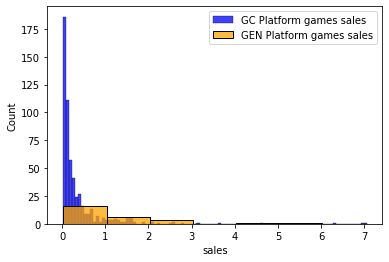

In [112]:
sns.histplot(x = game_df[game_df['Platform']=='GC']['global_sales'], color = 'blue', label = 'GC Platform games sales')
sns.histplot(x = game_df[game_df['Platform']=='GEN']['global_sales'], color = 'orange', label = 'GEN Platform games sales')
plt.xlabel("sales")
plt.legend()
plt.show()

##### Hypothesis Test-3

H0 = True Median of global Sales on GC Platform games = True Median of global Sales on GEN Platform games

H1 = True Median of global Sales on GC Platform games != True Median of global Sales on GEN Platform games

In [113]:
ranksums(game_df[game_df['Platform']=='GC']['global_sales'], game_df[game_df['Platform']=='GEN']['global_sales'])

RanksumsResult(statistic=-1.5636296054744525, pvalue=0.11790457806738419)

As P-value = 0.12 > 0.05, we failed to reject Null Hypothesis.

So, True Median of global Sales on GC Platform games is equal to True Median of global Sales on GEN Platform games.

##### checking relation between Genre and Platform

In [114]:
# Relation between Genre and Platform.
genre_platform = pd.crosstab(index=game_df['Genre'],columns=game_df['Platform'],margins=False)
genre_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,65,10,203,132,33


##### Hypothesis

H0 - There is no relation between Genre and Platform

H1: There is relation between Genre and Platform

In [115]:
from scipy.stats import chi2_contingency
chi2_contingency(genre_platform)

(5910.285990434127,
 0.0,
 330,
 array([[2.65743553e+01, 5.99421547e-01, 1.01701856e+02, 1.03899735e+01,
         4.32182936e+02, 1.95811039e+01, 1.64241504e+02, 1.11092793e+02,
         5.39479393e+00, 1.99807182e-01, 6.37384912e+01, 1.95811039e+01,
         2.39768619e+00, 1.91814895e+02, 1.99807182e-01, 2.38969390e+02,
         4.31583514e+02, 2.65543745e+02, 6.71352133e+01, 2.42366112e+02,
         8.25203664e+01, 3.45666426e+01, 1.19884309e+00, 4.77539166e+01,
         3.99614365e-01, 1.19884309e+00, 2.64544710e+02, 2.85724271e+01,
         2.52756086e+02, 1.64641118e+02, 4.25589299e+01],
        [1.03059773e+01, 2.32465654e-01, 3.94416727e+01, 4.02940468e+00,
         1.67607737e+02, 7.59387804e+00, 6.36955893e+01, 4.30836346e+01,
         2.09219089e+00, 7.74885515e-02, 2.47188479e+01, 7.59387804e+00,
         9.29862617e-01, 7.43890094e+01, 7.74885515e-02, 9.26763075e+01,
         1.67375271e+02, 1.02982285e+02, 2.60361533e+01, 9.39936129e+01,
         3.20027718e+01, 1.3405519

As P-value = 0 < 0.05, we can reject Null Hypothesis.

So, There is relationship between Genre and Platform and they are not independent.

In [116]:
game_df.groupby('Genre').describe()

Year                                                         \
               count         mean       std     min     25%     50%     75%   
Genre                                                                         
Action        3253.0  2007.909929  6.073115  1980.0  2005.0  2009.0  2012.0   
Adventure     1276.0  2008.130878  4.910744  1983.0  2006.0  2009.0  2011.0   
Fighting       836.0  2004.630383  6.158271  1980.0  2000.0  2005.0  2009.0   
Misc          1710.0  2007.258480  4.661619  1980.0  2005.0  2008.0  2010.0   
Platform       876.0  2003.820776  6.388817  1981.0  2001.0  2004.0  2008.0   
Puzzle         571.0  2005.243433  6.185603  1981.0  2003.0  2007.0  2009.0   
Racing        1225.0  2004.837551  5.283520  1981.0  2002.0  2005.0  2009.0   
Role-Playing  1471.0  2007.055744  5.872305  1986.0  2004.0  2008.0  2011.0   
Shooter       1282.0  2005.918877  6.354083  1980.0  2003.0  2007.0  2010.0   
Simulation     851.0  2006.567568  4.869456  1981.0  2004.5  2008.0  2009.0   
Sports        2304.0  2005.477865  5.633659  1980.0  2002.0  2006.0  2009.0   
Strategy       671.0  2005.599106  5.438827  1991.0  2002.0  2007.0  2009.5   

                     NA_Sales            ...      Rank           decade  \
                 max    count      mean  ...       75%      max   count   
Genre                                    ...                              
Action        2017.0   3316.0  0.264726  ...  11969.50  16596.0  3253.0   
Adventure     2016.0   1286.0  0.082271  ...  14998.50  16594.0  1276.0   
Fighting      2016.0    848.0  0.263667  ...  11492.25  16574.0   836.0   
Misc          2016.0   1739.0  0.235906  ...  12482.50  16589.0  1710.0   
Platform      2016.0    886.0  0.504571  ...  10927.50  16588.0   876.0   
Puzzle        2015.0    582.0  0.212680  ...  13676.00  16561.0   571.0   
Racing        2016.0   1248.0  0.287997  ...  12003.50  16592.0  1225.0   
Role-Playing  2017.0   1488.0  0.219946  ...  12100.50  16595.0  1471.0   
Shooter       2016.0   1309.0  0.445073  ...  11699.00  16593.0  1282.0   
Simulation    2020.0    867.0  0.211430  ...  12903.50  16559.0   851.0   
Sports        2016.0   2346.0  0.291283  ...  10894.75  16584.0  2304.0   
Strategy      2016.0    681.0  0.100881  ...  13918.00  16587.0   671.0   

                                                                             
                     mean       std     min     25%     50%     75%     max  
Genre                                                                        
Action        2003.522902  6.705626  1980.0  2000.0  2000.0  2010.0  2010.0  
Adventure     2003.463950  6.230182  1980.0  2000.0  2000.0  2010.0  2010.0  
Fighting      1999.952153  6.972837  1980.0  2000.0  2000.0  2000.0  2010.0  
Misc          2002.520468  5.936902  1980.0  2000.0  2000.0  2010.0  2010.0  
Platform      1999.543379  6.813210  1980.0  2000.0  2000.0  2000.0  2010.0  
Puzzle        2000.122592  6.791561  1980.0  2000.0  2000.0  2000.0  2010.0  
Racing        2000.285714  6.049901  1980.0  2000.0  2000.0  2000.0  2010.0  
Role-Playing  2002.501700  6.770974  1980.0  2000.0  2000.0  2010.0  2010.0  
Shooter       2001.544462  6.964949  1980.0  2000.0  2000.0  2010.0  2010.0  
Simulation    2001.398355  5.884772  1980.0  2000.0  2000.0  2000.0  2020.0  
Sports        2000.954861  6.405711  1980.0  2000.0  2000.0  2000.0  2010.0  
Strategy      2000.670641  6.556097  1990.0  2000.0  2000.0  2005.0  2010.0  

[12 rows x 64 columns]

-0.037759918093018194


C:\Users\murth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\murth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


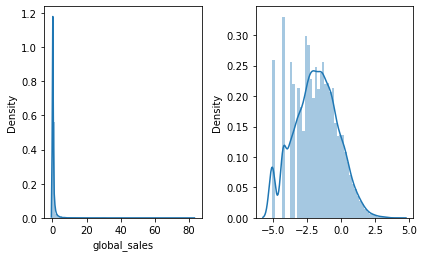

In [117]:
# analysing global_sales with box-cox plot
fitted_data, fitted_lambda = stats.boxcox(game_df['global_sales'])

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(game_df['global_sales'])
  
print(fitted_lambda)
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(game_df['global_sales'], ax=ax[0])
sns.distplot(fitted_data,ax=ax[1])
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()



A Box cox transformation is defined as a way to transform non-normal dependent variables in our data to a normal shape through which we can run a lot more tests than we could have.

Box-cox Transformation only cares about computing the value of lambda  which varies from – 5 to 5. A value of lambda  is said to be best if it is able to approximate the non-normal curve to a normal curve.

In [118]:
game_df['log_sales'] = np.log10(game_df['global_sales'])
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,Rank,decade,log_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,2000.0,1.917716
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,1980.0,1.604658
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3,2000.0,1.554247
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,2000.0,1.518514
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5,1990.0,1.496653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,16592,NaN,-2.000000
16592,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,16593,NaN,-2.000000
16593,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,16594,NaN,-2.000000
16594,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,16595,NaN,-2.000000


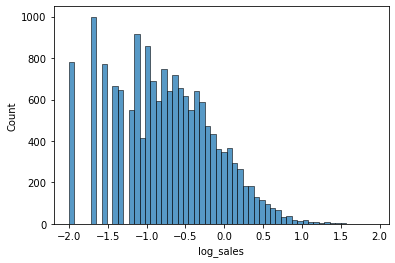

In [119]:
sns.histplot(x='log_sales',data=game_df)
plt.show()

##### taking hypothesis for relation between Genre and Global Sales

H0: true means of Global Sales are equal for all types of Genres.

H1: Atleast one true mean of global sales for Genre is different.

In [120]:
# performing one-way ANOVA
one_way_model_genre = ols('log_sales ~ C(Genre)', data=game_df).fit()
# fitted values
model_fitted_vals = one_way_model_genre.fittedvalues
#model residuals
model_residuals = one_way_model_genre.resid
#standardised residuals
model_norm_residuals = one_way_model_genre.get_influence().resid_studentized_internal

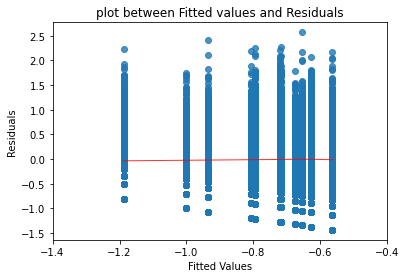

In [121]:
sns.regplot(x=model_fitted_vals,y=model_residuals, 
            ci=False,lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.xlim(-1.4,-0.4)
plt.title("plot between Fitted values and Residuals")
plt.show()

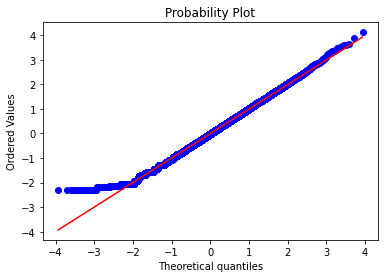

In [122]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [123]:
game_df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1309
Adventure       1286
Racing          1248
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [124]:
sm.stats.anova_lm(one_way_model_genre, typ=2)

,sum_sq,df,F,PR(>F)
C(Genre),395.537023,11.0,92.353789,1.739164e-204
Residual,6456.973836,16584.0,NaN,NaN


As p-value < 0.05, we can say atleast one mean value of global sales is different for Genres. so atleast one Genre is impacting global sales.

In [125]:
one_way_model_genre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     92.35
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.74e-204
Time:                        11:45:32   Log-Likelihood:                -15715.
No. Observations:               16596   AIC:                         3.145e+04
Df Residuals:                   16584   BIC:                         3.155e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.7219      0.011    -66.620      0.000      -0.743      -0.701
C(Genre)[T.Adventure]       -0.4662      0.020    -22.745      0.000      -0.506      -0.426
C(Genre)[T.Fighting]         0.0460      0.024      1.915      0.056      -0.001       0.093
C(Genre)[T.Misc]            -0.0725      0.018     -3.923      0.000      -0.109      -0.036
C(Genre)[T.Platform]         0.1578      0.024      6.686      0.000       0.112       0.204
C(Genre)[T.Puzzle]          -0.2133      0.028     -7.607      0.000      -0.268      -0.158
C(Genre)[T.Racing]           0.0039      0.021      0.190      0.849      -0.037       0.045
C(Genre)[T.Role-Playing]    -0.0001      0.019     -0.006      0.995      -0.038       0.038
C(Genre)[T.Shooter]          0.0940      0.020      4.614      0.000       0.054       0.134
C(Genre)[T.Simulation]      -0.0856      0.024     -3.594      0.000      -0.132      -0.039
C(Genre)[T.Sports]           0.0678      0.017      4.026      0.000       0.035       0.101
C(Genre)[T.Strategy]        -0.2794      0.026    -10.645      0.000      -0.331      -0.228
==============================================================================
Omnibus:                       95.791   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.050
Skew:                           0.142   Prob(JB):                     7.59e-20
Kurtosis:                       2.783   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### taking hypothesis for relation between Platforms and Global Sales

H0: true means of Global Sales are equal for all types of Platforms.

H1: Atleast one true mean of Global sales is different for Platforms.

In [126]:
game_df.groupby('Platform').describe()

Year                                                           \
           count         mean       std     min      25%     50%      75%   
Platform                                                                    
2600       116.0  1982.137931  1.990834  1980.0  1981.00  1982.0  1982.00   
3DO          3.0  1994.666667  0.577350  1994.0  1994.50  1995.0  1995.00   
3DS        500.0  2013.062000  1.609764  2011.0  2012.00  2013.0  2014.00   
DC          52.0  1999.942308  1.808623  1998.0  1999.00  2000.0  2000.00   
DS        2133.0  2008.201125  1.805339  1985.0  2007.00  2008.0  2009.00   
GB          97.0  1995.958763  4.178111  1988.0  1992.00  1997.0  2000.00   
GBA        811.0  2003.210851  1.474451  2000.0  2002.00  2003.0  2004.00   
GC         542.0  2003.400369  1.391896  2001.0  2002.00  2003.0  2005.00   
GEN         27.0  1993.037037  1.091276  1990.0  1992.00  1993.0  1994.00   
GG           1.0  1992.000000       NaN  1992.0  1992.00  1992.0  1992.00   
N64        316.0  1998.531646  1.222388  1996.0  1998.00  1999.0  1999.00   
NES         98.0  1987.153061  2.793040  1983.0  1985.00  1986.5  1989.00   
NG          12.0  1994.500000  1.000000  1993.0  1994.00  1994.5  1995.00   
PC         943.0  2008.773065  4.577875  1985.0  2007.00  2009.0  2011.00   
PCFX         1.0  1996.000000       NaN  1996.0  1996.00  1996.0  1996.00   
PS        1189.0  1998.004205  1.847963  1994.0  1997.00  1998.0  1999.00   
PS2       2126.0  2004.582314  2.567223  2000.0  2002.00  2005.0  2007.00   
PS3       1304.0  2010.819785  2.441118  2006.0  2009.00  2011.0  2013.00   
PS4        336.0  2015.005952  0.863848  2013.0  2014.00  2015.0  2016.00   
PSP       1197.0  2008.721805  2.436546  2004.0  2006.00  2009.0  2011.00   
PSV        412.0  2014.033981  1.405173  2011.0  2013.00  2014.0  2015.00   
SAT        173.0  1996.028902  1.291420  1994.0  1995.00  1996.0  1997.00   
SCD          6.0  1993.833333  0.408248  1993.0  1994.00  1994.0  1994.00   
SNES       239.0  1993.845188  1.679426  1990.0  1993.00  1994.0  1995.00   
TG16         2.0  1995.000000  0.000000  1995.0  1995.00  1995.0  1995.00   
WS           6.0  2000.000000  0.894427  1999.0  1999.25  2000.0  2000.75   
Wii       1290.0  2008.962791  1.532734  2006.0  2008.00  2009.0  2010.00   
WiiU       143.0  2013.594406  1.228980  2012.0  2013.00  2013.0  2015.00   
X360      1235.0  2009.882591  2.451800  2005.0  2008.00  2010.0  2011.00   
XB         803.0  2003.636364  1.366603  2000.0  2003.00  2004.0  2005.00   
XOne       213.0  2014.788732  0.925256  2013.0  2014.00  2015.0  2016.00   

                 NA_Sales            ...  decade         log_sales            \
             max    count      mean  ...     75%     max     count      mean   
Platform                             ...                                       
2600      1989.0    133.0  0.681203  ...  1980.0  1980.0     133.0 -0.299707   
3DO       1995.0      3.0  0.000000  ...  1990.0  1990.0       3.0 -1.539930   
3DS       2016.0    509.0  0.154951  ...  2010.0  2010.0     509.0 -0.859354   
DC        2008.0     52.0  0.104423  ...  2000.0  2000.0      52.0 -0.800177   
DS        2020.0   2163.0  0.180633  ...  2000.0  2020.0    2163.0 -0.928853   
GB        2001.0     98.0  1.166531  ...  2000.0  2000.0      98.0 -0.024052   
GBA       2007.0    822.0  0.228151  ...  2000.0  2000.0     822.0 -0.824088   
GC        2007.0    556.0  0.240036  ...  2000.0  2000.0     556.0 -0.814498   
GEN       1994.0     27.0  0.713704  ...  1990.0  1990.0      27.0 -0.509232   
GG        1992.0      1.0  0.000000  ...  1990.0  1990.0       1.0 -1.397940   
N64       2002.0    319.0  0.435799  ...  1990.0  2000.0     319.0 -0.527356   
NES       1994.0     98.0  1.285102  ...  1980.0  1990.0      98.0  0.158071   
NG        1996.0     12.0  0.000000  ...  1990.0  1990.0      12.0 -1.042201   
PC        2016.0    960.0  0.097167  ...  2010.0  2010.0     960.0 -1.190518   
PCFX      1996.0      1.0  0.0000

In [127]:
# performing one-way ANOVA
one_way_model_platform = ols('log_sales ~ C(Platform)', data=game_df).fit()
# fitted values
model_fitted_vals = one_way_model_platform.fittedvalues
#model residuals
model_residuals = one_way_model_platform.resid
#standardised residuals
model_norm_residuals = one_way_model_platform.get_influence().resid_studentized_internal

C:\Users\murth\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


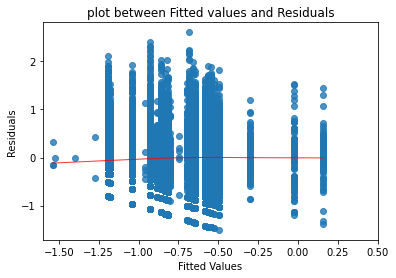

In [128]:
sns.regplot(x=model_fitted_vals,y=model_residuals, 
            ci=False,lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.xlim(-1.6,0.5)
plt.title("plot between Fitted values and Residuals")
plt.show()

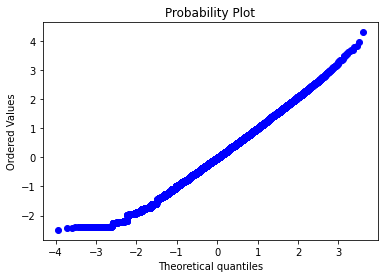

In [129]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [130]:
game_df['Platform'].value_counts()

DS      2163
PS2     2160
PS3     1329
Wii     1324
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [131]:
sm.stats.anova_lm(one_way_model_platform, typ=2)

,sum_sq,df,F,PR(>F)
C(Platform),810.513244,30.0,74.071263,0.0
Residual,6041.997615,16565.0,NaN,NaN


As p-value < 0.05, there is atleast one true mean of global sales is different for Platforms. So atleast one platform is effecting the global sales.

In [132]:
one_way_model_platform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     74.07
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:45:35   Log-Likelihood:                -15164.
No. Observations:               16596   AIC:                         3.039e+04
Df Residuals:                   16565   BIC:                         3.063e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2997      0.052     -5.723      0.000      -0.402      -0.197
C(Platform)[T.3DO]     -1.2402      0.353     -3.517      0.000      -1.931      -0.549
C(Platform)[T.3DS]     -0.5596      0.059     -9.516      0.000      -0.675      -0.444
C(Platform)[T.DC]      -0.5005      0.099     -5.067      0.000      -0.694      -0.307
C(Platform)[T.DS]      -0.6291      0.054    -11.661      0.000      -0.735      -0.523
C(Platform)[T.GB]       0.2757      0.080      3.428      0.001       0.118       0.433
C(Platform)[T.GBA]     -0.5244      0.056     -9.290      0.000      -0.635      -0.414
C(Platform)[T.GC]      -0.5148      0.058     -8.831      0.000      -0.629      -0.401
C(Platform)[T.GEN]     -0.2095      0.127     -1.644      0.100      -0.459       0.040
C(Platform)[T.GG]      -1.0982      0.606     -1.812      0.070      -2.286       0.090
C(Platform)[T.N64]     -0.2276      0.062     -3.652      0.000      -0.350      -0.105
C(Platform)[T.NES]      0.4578      0.080      5.694      0.000       0.300       0.615
C(Platform)[T.NG]      -0.7425      0.182     -4.079      0.000      -1.099      -0.386
C(Platform)[T.PC]      -0.8908      0.056    -15.942      0.000      -1.000      -0.781
C(Platform)[T.PCFX]    -1.2232      0.606     -2.018      0.044      -2.411      -0.035
C(Platform)[T.PS]      -0.2847      0.055     -5.157      0.000      -0.393      -0.176
C(Platform)[T.PS2]     -0.3564      0.054     -6.606      0.000      -0.462      -0.251
C(Platform)[T.PS3]     -0.2646      0.055     -4.818      0.000      -0.372      -0.157
C(Platform)[T.PS4]     -0.3471      0.062     -5.610      0.000      -0.468      -0.226
C(Platform)[T.PSP]     -0.7387      0.055    -13.391      0.000      -0.847      -0.631
C(Platform)[T.PSV]     -0.8797      0.060    -14.610      0.000      -0.998      -0.762
C(Platform)[T.SAT]     -0.5860      0.070     -8.413      0.000      -0.722      -0.449
C(Platform)[T.SCD]     -0.6592      0.252     -2.615      0.009      -1.153      -0.165
C(Platform)[T.SNES]    -0.1963      0.065     -3.005      0.003      -0.324      -0.068
C(Platform)[T.TG16]    -0.9767      0.430     -2.270      0.023      -1.820      -0.133
C(Platform)[T.WS]      -0.4477      0.252     -1.776      0.076      -0.942       0.046
C(Platform)[T.Wii]     -0.3854      0.055     -7.016      0.000      -0.493      -0.278
C(Platform)[T.WiiU]    -0.3992      0.073     -5.487      0.000      -0.542      -0.257
C(Platform)[T.X360]    -0.2481      0.055     -4.507      0.000      -0.356      -0.140
C(Platform)[T.XB]      -0.5333      0.056     -9.450      0.000      -0.644      -0.423
C(Platform)[T.XOne]    -0.3474      0.067     -5.204      0.000      -0.478      -0.217
==============================================================================
Omnibus:    

In [133]:
# performing regression without interaction
model_both = ols('log_sales ~ C(Genre) + C(Platform)', data=game_df).fit()
# fitted values
model_fitted_vals = model_both.fittedvalues
#model residuals
model_residuals = model_both.resid
#standardised residuals
model_norm_residuals = model_both.get_influence().resid_studentized_internal

C:\Users\murth\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


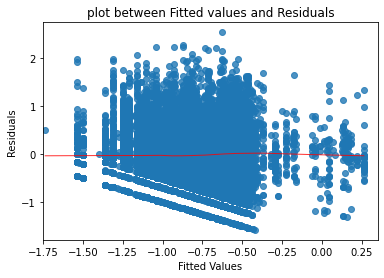

In [134]:
sns.regplot(x=model_fitted_vals,y=model_residuals, 
            ci=False,lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.xlim(-1.75,0.35)
plt.title("plot between Fitted values and Residuals")
plt.show()

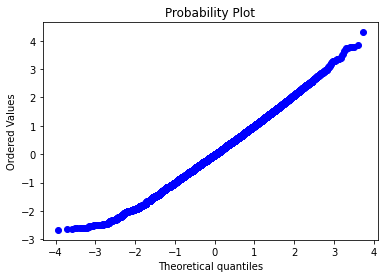

In [135]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [136]:
# performing two-way ANOVA
sm.stats.anova_lm(model_both, typ=2)

,sum_sq,df,F,PR(>F)
C(Genre),243.061251,11.0,63.077962,1.099279e-138
C(Platform),658.037472,30.0,62.615806,0.000000e+00
Residual,5798.936364,16554.0,NaN,NaN


In [137]:
model_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     73.36
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:45:38   Log-Likelihood:                -14823.
No. Observations:               16596   AIC:                         2.973e+04
Df Residuals:                   16554   BIC:                         3.006e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2966      0.052     -5.726      0.000      -0.398      -0.195
C(Genre)[T.Adventure]       -0.3996      0.020    -20.230      0.000      -0.438      -0.361
C(Genre)[T.Fighting]         0.0089      0.023      0.386      0.700      -0.037       0.054
C(Genre)[T.Misc]            -0.0743      0.018     -4.175      0.000      -0.109      -0.039
C(Genre)[T.Platform]         0.1163      0.023      5.091      0.000       0.072       0.161
C(Genre)[T.Puzzle]          -0.1885      0.027     -6.925      0.000      -0.242      -0.135
C(Genre)[T.Racing]          -0.0229      0.020     -1.151      0.250      -0.062       0.016
C(Genre)[T.Role-Playing]     0.0342      0.019      1.826      0.068      -0.003       0.071
C(Genre)[T.Shooter]          0.0710      0.020      3.624      0.000       0.033       0.109
C(Genre)[T.Simulation]      -0.0230      0.023     -1.000      0.317      -0.068       0.022
C(Genre)[T.Sports]           0.0190      0.016      1.169      0.242      -0.013       0.051
C(Genre)[T.Strategy]        -0.1747      0.026     -6.841      0.000      -0.225      -0.125
C(Platform)[T.3DO]          -1.0396      0.346     -3.007      0.003      -1.717      -0.362
C(Platform)[T.3DS]          -0.5259      0.058     -9.095      0.000      -0.639      -0.413
C(Platform)[T.DC]           -0.4328      0.097     -4.457      0.000      -0.623      -0.242
C(Platform)[T.DS]           -0.5544      0.053    -10.420      0.000      -0.659      -0.450
C(Platform)[T.GB]            0.3097      0.079      3.914      0.000       0.155       0.465
C(Platform)[T.GBA]          -0.5124      0.056     -9.229      0.000      -0.621      -0.404
C(Platform)[T.GC]           -0.5152      0.057     -8.990      0.000      -0.628      -0.403
C(Platform)[T.GEN]          -0.2133      0.125     -1.704      0.088      -0.459       0.032
C(Platform)[T.GG]           -1.2176      0.594     -2.048      0.041      -2.383      -0.053
C(Platform)[T.N64]          -0.2274      0.061     -3.707      0.000      -0.348      -0.107
C(Platform)[T.NES]           0.4429      0.079      5.603      0.000       0.288       0.598
C(Platform)[T.NG]           -0.7554      0.179     -4.209      0.000      -1.107      -0.404
C(Platform)[T.PC]           -0.8387      0.055    -15.205      0.000      -0.947      -0.731
C(Platform)[T.PCFX]         -1.2604      0.594     -2.121      0.034      -2.425      -0.095
C(Platform)[T.PS]           -0.2598      0.054     -4.780      0.000      -0.366      -0.153
C(Platform)[T.PS2]          -0.3229      0.053     -6.080      0.000      -0.427      -0.219
C(Platform)[T.PS3]          -0.2510      0.054     -4.652      0.000      -0.357      -0.145
C(Platform)[T.PS4]          -0.3383      0.061     -5.569      0.000      -0.457      -0.219
C(Platform)[T.

In [138]:
# checking standard error for Genre + Platform
np.sqrt(model_both.scale)

0.5918650509342326

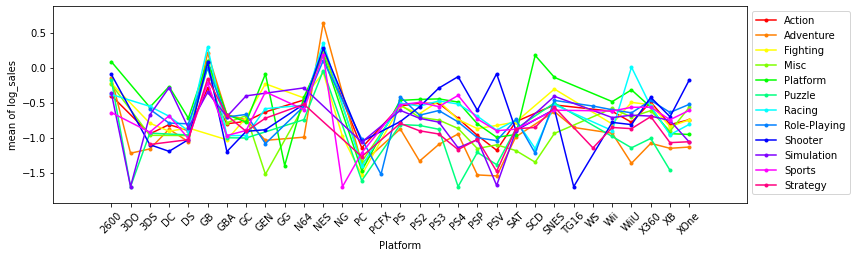

In [139]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(game_df['Platform'], game_df['Genre'], game_df['log_sales'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.tight_layout(rect = [0, 0.03, 2, 0.95])
plt.show()

In [140]:
# performing regression with interaction
model_both_int = ols('log_sales ~ C(Genre) * C(Platform)', data=game_df).fit()
# fitted values
model_fitted_vals = model_both_int.fittedvalues
#model residuals
model_residuals = model_both_int.resid
#standardised residuals
model_norm_residuals = model_both_int.get_influence().resid_studentized_internal

C:\Users\murth\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


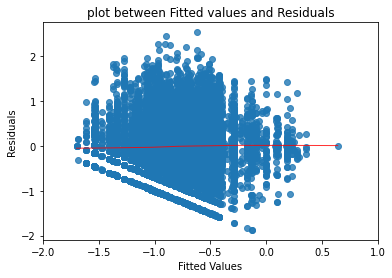

In [141]:
sns.regplot(x=model_fitted_vals,y=model_residuals, 
            ci=False,lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.xlim(-2,1)
plt.title("plot between Fitted values and Residuals")
plt.show()

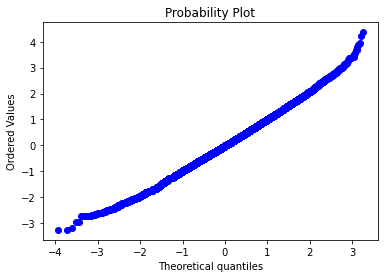

In [142]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [143]:
# performing two-way ANOVA
sm.stats.anova_lm(model_both_int, typ=2)

C:\Users\murth\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  warnings.warn('covariance of constraints does not have full '
C:\Users\murth\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 30, but rank is 26
  warnings.warn('covariance of constraints does not have full '
C:\Users\murth\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 330, but rank is 260
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Genre),103.551543,11.0,27.751074,2.624517e-53
C(Platform),696.213105,30.0,68.412718,0.000000e+00
C(Genre):C(Platform),386.465710,330.0,3.452335,1.864378e-68
Residual,5530.337326,16303.0,NaN,NaN


In [144]:
model_both_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     13.35
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -14430.
No. Observations:               16596   AIC:                         2.945e+04
Df Residuals:                   16303   BIC:                         3.171e+04
Df Model:                         292                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.3979      0.075     -5.335      0.000      -0.544      -0.252
C(Genre)[T.Adventure]                            0.2559      0.419      0.611      0.541      -0.565       1.076
C(Genre)[T.Fighting]                             0.1772      0.419      0.423      0.672      -0.643       0.998
C(Genre)[T.Misc]                                 0.1608      0.271      0.593      0.553      -0.370       0.692
C(Genre)[T.Platform]                             0.4849      0.208      2.331      0.020       0.077       0.893
C(Genre)[T.Puzzle]                               0.2274      0.191      1.192      0.233      -0.147       0.601
C(Genre)[T.Racing]                               0.0166      0.249      0.066      0.947      -0.472       0.505
C(Genre)[T.Role-Playing]                         0.0072      0.046      0.158      0.874      -0.082       0.097
C(Genre)[T.Shooter]                              0.3036      0.140      2.164      0.031       0.029       0.579
C(Genre)[T.Simulation]                           0.0413      0.587      0.070      0.944      -1.110       1.192
C(Genre)[T.Sports]                              -0.2423      0.184     -1.317      0.188      -0.603       0.118
C(Genre)[T.Strategy]                            -0.1682      0.055     -3.042      0.002      -0.277      -0.060
C(Platform)[T.3DO]                              -0.9877      0.312     -3.166      0.002      -1.599      -0.376
C(Platform)[T.3DS]                              -0.5480      0.086     -6.360      0.000      -0.717      -0.379
C(Platform)[T.DC]                               -0.4148      0.344     -1.204      0.229      -1.090       0.260
C(Platform)[T.DS]                               -0.5014      0.081     -6.195      0.000      -0.660      -0.343
C(Platform)[T.GB]                                0.1013      0.249      0.406      0.685      -0.387       0.590
C(Platform)[T.GBA]                              -0.4032      0.087     -4.627      0.000      -0.574      -0.232
C(Platform)[T.GC]                               -0.3685      0.094     -3.901      0.000      -0.554      -0.183
C(Platform)[T.GEN]                              -0.2337      0.344     -0.679      0.497      -0.909       0.441
C(Platform)[T.GG]                               -0.7425      0.307     -2.419      0.016      -1.344      -0.141
C(Platform)[T.N64]                              -0.0626      0.120     -0.520      0.603      -0.298       0.173
C(Platform)[T.NES]                               0.6286      0.178      3.533      0.000       0.280       0.977
C(Platform)[T.NG]                               -0.6069      0.251     -2.416      0.016      -1.099      -0.114
C(Platform)[T.PC]               

In [145]:
# checking standard error for Genre + Platform
np.sqrt(model_both_int.scale)

0.582427733718001

#### Analysis of regression models with and without Interaction:

###### without interaction:

Adjusted R-Square:15.2%

Standard error:0.59

AIC:2.973e+04

BIC:3.006e+04

###### with interaction:

Adjusted R-Square:17.8%

Standard error:0.58

AIC:2.945e+04

BIC:3.171e+04


#### Outcome of Analysis:

Adjusted R-Square increased for interaction model which tell that interaction model has more prediction level than without Interaction.

Standard error is less for interaction model.

AIC is less for Interaction model however BIC is more for Interaction model.

Need to check which model is best through F-test.

H0: Normal model(without Interaction) is preferred.

H1: Interaction model is preferred.

In [146]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_both,model_both_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,16554.0,5798.936364,0.0,NaN,NaN,NaN
1,16303.0,5530.337326,251.0,268.599039,3.154617,1.963271e-55


As P-value < 0.05, we can reject Null Hypothesis and can say Interaction model is preferred.

In [147]:
print("Genres: ",game_df['Genre'].unique())
print("Platforms: ", game_df['Platform'].unique())

Genres:  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Platforms:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [148]:
# for saving to file if necessary
for genre in game_df['Genre'].unique():
    for platform in game_df['Platform'].unique():
        sales = model_both_int.predict({'Genre':genre,'Platform':platform})
        print("sales for {0} Genre and {1} Platform is estimated to be".format(genre,platform),10**(sales[0]))

sales for Sports Genre and Wii Platform is estimated to be 0.2404819618295455
sales for Sports Genre and NES Platform is estimated to be 1.5340780418108793
sales for Sports Genre and GB Platform is estimated to be 0.603022635346081
sales for Sports Genre and DS Platform is estimated to be 0.09750657762747068
sales for Sports Genre and X360 Platform is estimated to be 0.2726461658234707
sales for Sports Genre and PS3 Platform is estimated to be 0.27796726111364317
sales for Sports Genre and PS2 Platform is estimated to be 0.31994362459645453
sales for Sports Genre and SNES Platform is estimated to be 0.24737037552145774
sales for Sports Genre and GBA Platform is estimated to be 0.10743222022184233
sales for Sports Genre and 3DS Platform is estimated to be 0.11990322097757224
sales for Sports Genre and PS4 Platform is estimated to be 0.4012503039252278
sales for Sports Genre and N64 Platform is estimated to be 0.25167648135820064
sales for Sports Genre and PS Platform is estimated to be 

sales for Role-Playing Genre and PC Platform is estimated to be 0.09578656135572743
sales for Role-Playing Genre and 2600 Platform is estimated to be 0.4067622299322181
sales for Role-Playing Genre and PSP Platform is estimated to be 0.10013932444052871
sales for Role-Playing Genre and XOne Platform is estimated to be 0.2998464126030459
sales for Role-Playing Genre and GC Platform is estimated to be 0.21510712993758033
sales for Role-Playing Genre and WiiU Platform is estimated to be 0.22656706608833166
sales for Role-Playing Genre and GEN Platform is estimated to be 0.08242570599616988
sales for Role-Playing Genre and DC Platform is estimated to be 0.16172010901939188
sales for Role-Playing Genre and PSV Platform is estimated to be 0.09059127784438355
sales for Role-Playing Genre and SAT Platform is estimated to be 0.18214709312865013
sales for Role-Playing Genre and SCD Platform is estimated to be 0.060000000000000095
sales for Role-Playing Genre and WS Platform is estimated to be 0.

sales for Shooter Genre and PCFX Platform is estimated to be 0.2186083452295877
sales for Simulation Genre and Wii Platform is estimated to be 0.1937728128388164
sales for Simulation Genre and NES Platform is estimated to be 1.870815600820461
sales for Simulation Genre and GB Platform is estimated to be 0.44478821140020586
sales for Simulation Genre and DS Platform is estimated to be 0.13805061068136174
sales for Simulation Genre and X360 Platform is estimated to be 0.2033951527038881
sales for Simulation Genre and PS3 Platform is estimated to be 0.1668980357182946
sales for Simulation Genre and PS2 Platform is estimated to be 0.18895603403428432
sales for Simulation Genre and SNES Platform is estimated to be 0.39074351853713063
sales for Simulation Genre and GBA Platform is estimated to be 0.2003447049135093
sales for Simulation Genre and 3DS Platform is estimated to be 0.2114009890961475
sales for Simulation Genre and PS4 Platform is estimated to be 0.07166256700225393
sales for Simu

sales for Adventure Genre and XB Platform is estimated to be 0.07052184839452669
sales for Adventure Genre and PC Platform is estimated to be 0.04268572565932219
sales for Adventure Genre and 2600 Platform is estimated to be 0.7211102550928171
sales for Adventure Genre and PSP Platform is estimated to be 0.029381000308911245
sales for Adventure Genre and XOne Platform is estimated to be 0.07357771553972846
sales for Adventure Genre and GC Platform is estimated to be 0.17980940230779854
sales for Adventure Genre and WiiU Platform is estimated to be 0.04308869380063653
sales for Adventure Genre and GEN Platform is estimated to be 0.09165151389911327
sales for Adventure Genre and DC Platform is estimated to be 0.13214976559547084
sales for Adventure Genre and PSV Platform is estimated to be 0.028425744942703904
sales for Adventure Genre and SAT Platform is estimated to be 0.10313219681637463
sales for Adventure Genre and SCD Platform is estimated to be 0.23552111474900994
sales for Advent

In [149]:
# for saving to csv file
pre_list = []
for genre in game_df['Genre'].unique():
    for platform in game_df['Platform'].unique():
        sales = model_both_int.predict({'Genre':genre,'Platform':platform})
        pre_list.append([genre, platform, 10**(sales[0])])
pre_df = pd.DataFrame(pre_list,columns=['VideoGame_Genre','VideoGame_Platform','Sales_Estimation'])
pre_df.to_csv(fpath+"//GenrePlatformPredict.csv", index=False)
game_df.to_csv(fpath+"//Final_Games_Info.csv", index=False)

### Research questions

In [150]:
# How many total Video Game sales are happening annually irrespective of Genres and Platforms?

sales_yearly = game_df.groupby(['Year']).global_sales.agg(['sum'])
sales_yearly.describe()

,sum
count,39.000000
mean,226.047692
std,212.211797
min,0.050000
25%,46.600000
50%,199.150000
75%,365.640000
max,678.490000


In [151]:
# Which Platforms of Video Games are to be developed more considering the trend of the sales?
platform_sales = []
for platform in game_df['Platform'].unique():
    sales_p = one_way_model_platform.predict({'Platform':platform})
    platform_sales.append([platform,10**(sales_p[0])])
platform_df = pd.DataFrame(platform_sales,columns = ['Platform','Sales'])
platform_df

,Platform,Sales
0,Wii,0.206477
1,NES,1.439035
2,GB,0.946123
3,DS,0.117801
4,X360,0.283254
5,PS3,0.272689
6,PS2,0.220731
7,SNES,0.319142
8,GBA,0.149938
9,3DS,0.138244


In [152]:
platform_df.loc[platform_df.Sales.idxmax()]

Platform         NES
Sales       1.439035
Name: 1, dtype: object

In [153]:
# Which Theme of Video Games is grabbing the attention of the Public thus increasing from 1980 to 2020?

genre_inc = game_df.groupby(['Genre','decade']).global_sales.agg([np.mean])
genre_inc.reset_index(inplace=True)
genre_inc

,Genre,decade,mean
0,Action,1980.0,0.774242
1,Action,1990.0,0.859630
2,Action,2000.0,0.541521
3,Action,2010.0,0.467493
4,Adventure,1980.0,2.390000
5,Adventure,1990.0,0.461856
6,Adventure,2000.0,0.195536
7,Adventure,2010.0,0.112357
8,Fighting,1980.0,1.810000
9,Fighting,1990.0,0.639948


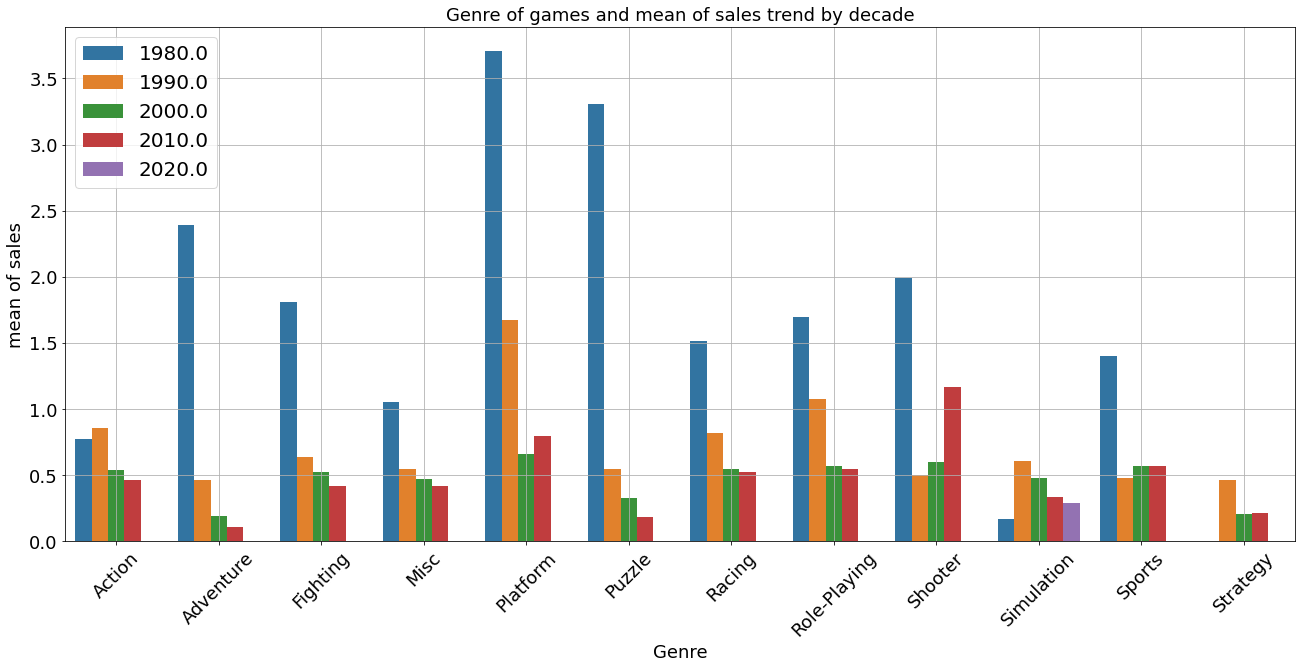

In [154]:
sns.barplot(x='Genre',y='mean',hue='decade',data=genre_inc)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.xlabel("Genre",fontsize=18)
plt.ylabel("mean of sales",fontsize=18)
plt.title("Genre of games and mean of sales trend by decade", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size': 20})
plt.grid()
plt.show()

In [155]:
# 	Find the Global sales of each Video Game irrespective of Platform, Genre, and Company.

 
# 	Rank the games based on the copies produced globally.

game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,Rank,decade,log_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,2000.0,1.917716
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,1980.0,1.604658
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3,2000.0,1.554247
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,2000.0,1.518514
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5,1990.0,1.496653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,16592,NaN,-2.000000
16592,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,16593,NaN,-2.000000
16593,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,16594,NaN,-2.000000
16594,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,16595,NaN,-2.000000


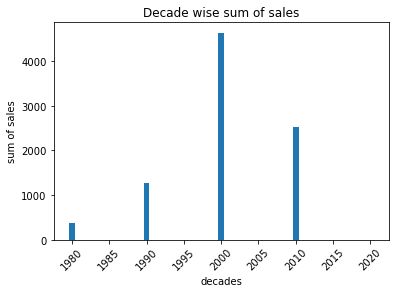

In [156]:
# 	Draw the Trend for the copies produced each year from 1980 to 2020.
# sales analysis of decade across different decades globally
decade_sum = {}
for k1 in list(decade_ana.index):
    decade_sum[k1] = decade_ana.loc[k1,'sum']
fig, ax = plt.subplots()
ax.bar(x=list(decade_sum.keys()),height=list(decade_sum.values()))
ax.set_ylabel("sum of sales")
ax.set_xlabel('decades')
ax.set_title("Decade wise sum of sales")
ax.tick_params('x', labelrotation = 45)
#plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.show()

In [157]:
# 	Which Platforms games are stopped producing from 21st Century.
platform_20 = game_df.loc[game_df['Year']<2000,'Platform']
platform_20_list = list(platform_20.unique())
print("20th Century Platforms:",platform_20_list)

platform_21 = game_df.loc[game_df['Year']>2000,'Platform']
platform_21_list = list(platform_21.unique())
print("21th Century Platforms:",platform_21_list)

print("Platforms that stopped in 21st century are:",list(set(platform_20_list).difference(set(platform_21_list))))

20th Century Platforms: ['NES', 'GB', 'SNES', 'N64', 'PS', '2600', 'GEN', 'PC', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX', 'DS']
21th Century Platforms: ['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', '3DS', 'PS4', 'XB', 'PC', 'PSP', 'XOne', 'GC', 'WiiU', 'PS', 'PSV', 'GB', 'N64', 'DC', 'WS']
Platforms that stopped in 21st century are: ['SAT', 'SCD', 'TG16', 'PCFX', 'SNES', '2600', 'NG', 'NES', 'GEN', 'GG', '3DO']


In [158]:
# 	Draw the Trends for each Genre of Video Games copies produced from 1980 to 2020.
game_genre_dec = game_df.groupby(['Genre','decade']).global_sales.agg(['sum'])
game_genre_dec.reset_index(inplace=True)
game_genre_dec

,Genre,decade,sum
0,Action,1980.0,51.10
1,Action,1990.0,139.26
2,Action,2000.0,858.31
3,Action,2010.0,673.19
4,Adventure,1980.0,4.78
5,Adventure,1990.0,44.80
6,Adventure,2000.0,123.97
7,Adventure,2010.0,61.01
8,Fighting,1980.0,7.24
9,Fighting,1990.0,123.51


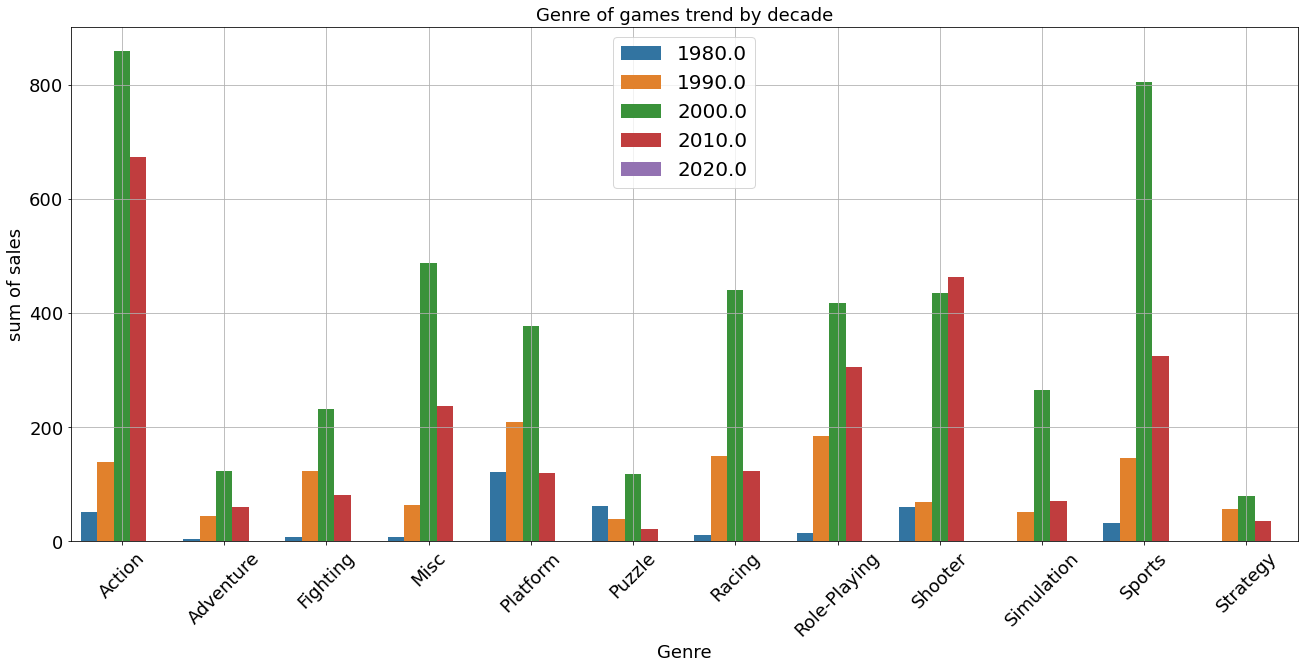

In [159]:
sns.barplot(x='Genre',y='sum',hue='decade',data=game_genre_dec)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.xlabel("Genre",fontsize=18)
plt.ylabel("sum of sales",fontsize=18)
plt.title("Genre of games trend by decade", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size': 20})
plt.grid()
plt.show()

In [160]:
# Which Theme of Video Games is grabbing the attention of the Public thus increasing from 1980 to 2020?

platform_sum = game_df.groupby(['Platform']).global_sales.agg(['sum'])
platform_sum.reset_index(inplace=True)
platform_sum

,Platform,sum
0,2600,96.98
1,3DO,0.10
2,3DS,247.37
3,DC,15.95
4,DS,821.46
5,GB,255.46
6,GBA,317.85
7,GC,198.93
8,GEN,28.35
9,GG,0.04


In [161]:
platform_sum.loc[platform_sum['sum'].idxmax()]

Platform        PS2
sum         1255.77
Name: 16, dtype: object

In [162]:
# 	Is the company that produced more in the 20th century still producing more games in the 21st century?
publisher_20 = game_df[game_df['Year']<2000]['Publisher'].value_counts()
print("Games made by companies in 20th century: ")
print(publisher_20)
print(50*"=")
print("Games made by companies in 21st century: ")
publisher_21 = game_df[game_df['Year']>=2000]['Publisher'].value_counts()
print(publisher_21)

Games made by companies in 20th century: 
Nintendo                        171
Sony Computer Entertainment     155
Konami Digital Entertainment    125
Sega                            116
Electronic Arts                 108
                               ... 
Answer Software                   1
Panther Software                  1
SSI                               1
Origin Systems                    1
KSS                               1
Name: Publisher, Length: 210, dtype: int64
Games made by companies in 21st century: 
Electronic Arts                 1231
Activision                       909
Ubisoft                          899
Namco Bandai Games               840
Konami Digital Entertainment     698
                                ... 
Naxat Soft                         1
Abylight                           1
Commseed                           1
Aria                               1
Lighthouse Interactive             1
Name: Publisher, Length: 457, dtype: int64


In [163]:
# •	Which Genre Video Games are decreasing more every year?
genre_sum = game_df.groupby(['Genre','decade']).decade.agg(['count'])
genre_sum.reset_index(inplace=True)
genre_sum

,Genre,decade,count
0,Action,1980.0,66
1,Action,1990.0,162
2,Action,2000.0,1585
3,Action,2010.0,1440
4,Adventure,1980.0,2
5,Adventure,1990.0,97
6,Adventure,2000.0,634
7,Adventure,2010.0,543
8,Fighting,1980.0,4
9,Fighting,1990.0,193


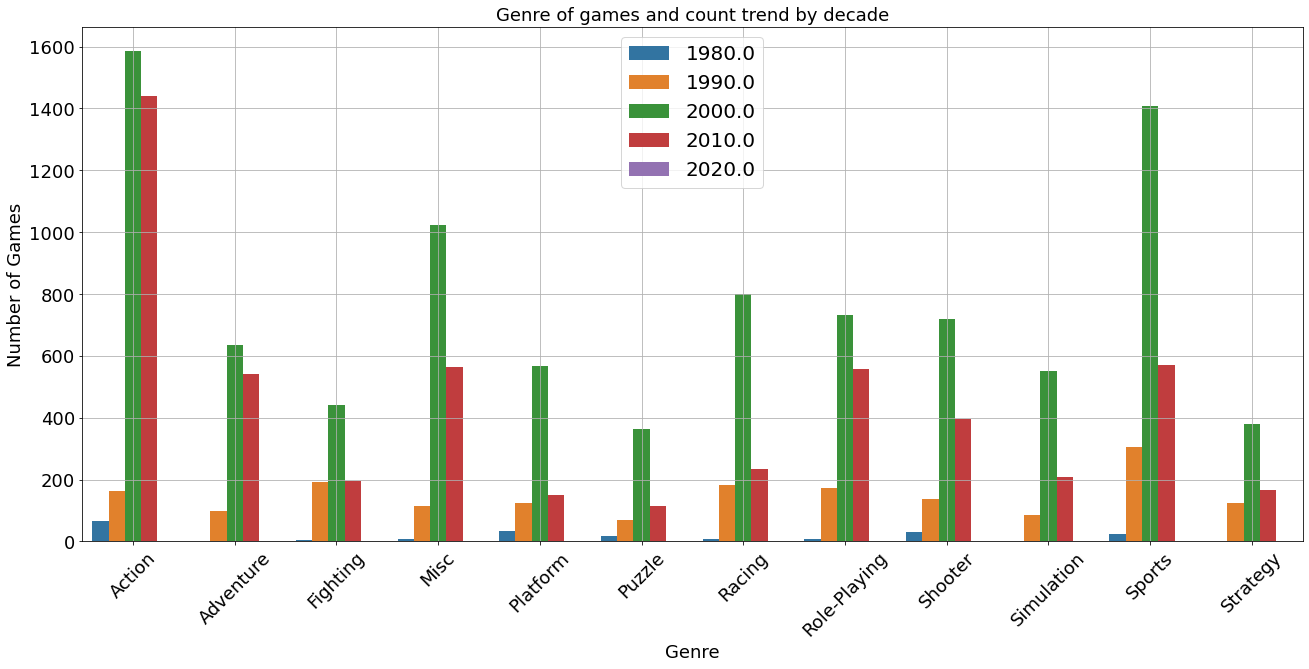

In [164]:
sns.barplot(x='Genre',y='count',hue='decade',data=genre_sum)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.xlabel("Genre",fontsize=18)
plt.ylabel("Number of Games",fontsize=18)
plt.title("Genre of games and count trend by decade", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size': 20})
plt.grid()
plt.show()

In [165]:
game_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','global_sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales
count,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000
mean,0.264699,0.146670,0.077790,0.048069,0.537228
std,0.816727,0.505379,0.309308,0.188599,1.555234
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.472500
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [166]:
game_df['Genre'].describe()

count      16596
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

In [167]:
game_df['Platform'].describe()

count     16596
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [168]:
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,Rank,decade,log_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,2000.0,1.917716
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,1980.0,1.604658
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3,2000.0,1.554247
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,2000.0,1.518514
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5,1990.0,1.496653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,16592,NaN,-2.000000
16592,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,16593,NaN,-2.000000
16593,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,16594,NaN,-2.000000
16594,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,16595,NaN,-2.000000
